## Webscraping Project on Cars24
In this Python project, we conducted web scraping on Cars24 to gather data on used cars from five different cities: Hyderabad, Delhi, Mumbai, Bangalore, and Chennai. We extracted information such as Car Name, Model, Gear, Price, EMI, Location, and Features by identifying HTML tags and class names. Afterward, we carried out feature engineering to extract specific attributes like Car Brand and Model Year from the Car Name field and Driven (Kms), Ownership, and Fuel from the Features field. Subsequently, we cleaned the data using regular expressions and saved it in a CSV file. Finally, we conducted data analysis on the dataset to derive insights from the collected information.

### Tools Used:
- BeautifulSoup, Selenium to read and extract data from url.
- Pandas & NumPy for analysing the data.
- Seaborn, Matplotlib for visualising the data.

### Problem Statement: To analyze the the details of used cars based on different categories.
### Importing necessary libraries

In [1]:
import bs4
from bs4 import BeautifulSoup
import requests
import re
import time
from datetime import datetime

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from selenium import webdriver
from mpl_toolkits.mplot3d import Axes3D

### Gathering cars data from website

<b> Hyderabad City Cars

In [2]:
# For city Hyderabad
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

driver_H = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
driver_H.get('https://www.cars24.com/buy-used-cars-hyderabad/?itm_source=Cars24Website&itm_medium=sticky_header')
ScrollNumber_H = 30
for i in range(1,ScrollNumber_H):
    driver_H.execute_script("window.scrollTo(1,50000000)")
    time.sleep(5)
file_H = open('cars24_Hyderabad.html', 'w', encoding='utf-8')
file_H.write(driver_H.page_source)
file_H.close()
driver_H.close()

In [3]:
data_H = open('cars24_Hyderabad.html','r')
soup_H = BeautifulSoup(data_H, 'html.parser')

<b> Delhi City Cars

In [4]:
# For city Delhi
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

driver_D = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
driver_D.get('https://www.cars24.com/buy-used-car?sort=P&storeCityId=2&pinId=110001')
ScrollNumber_D = 30
for i in range(1,ScrollNumber_D):
    driver_D.execute_script("window.scrollTo(1,50000000)")
    time.sleep(5)
file_D = open('cars24_Delhi.html', 'w', encoding='utf-8')
file_D.write(driver_D.page_source)
file_D.close()
driver_D.close()

In [5]:
data_D = open('cars24_Delhi.html','r')
soup_D = BeautifulSoup(data_D, 'html.parser')

<b> Mumbai City Cars

In [6]:
# For Mumbai
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

driver_M = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
driver_M.get('https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001')
ScrollNumber_M = 30
for i in range(1,ScrollNumber_M):
    driver_M.execute_script("window.scrollTo(1,50000000)")
    time.sleep(5)
file_M = open('cars24_Mumbai.html', 'w', encoding='utf-8')
file_M.write(driver_M.page_source)
file_M.close()
driver_M.close()

In [7]:
data_M = open('cars24_Mumbai.html','r')
soup_M = BeautifulSoup(data_M, 'html.parser')

<b> Bangalore City Cars

In [8]:
# For Bangalore
from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
chrome_options.executable_path = "C:\\browsedrivers\\chromedriver.exe"

driver_B = webdriver.Chrome(options=chrome_options)
driver_B.get('https://www.cars24.com/buy-used-car?sort=P&storeCityId=4709&pinId=560001')
ScrollNumber_B = 30
for i in range(1,ScrollNumber_B):
    driver_B.execute_script("window.scrollTo(1,50000000)")
    time.sleep(5)
file_B = open('cars24_Bangalore.html', 'w', encoding='utf-8')
file_B.write(driver_B.page_source)
file_B.close()
driver_B.close()

In [9]:
data_B = open('cars24_Bangalore.html','r')
soup_B = BeautifulSoup(data_B, 'html.parser')

<b> Chennai City Cars

In [10]:
# For Chennai
from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
chrome_options.executable_path = "C:\\browsedrivers\\chromedriver.exe"

driver_C = webdriver.Chrome(options=chrome_options)
driver_C.get('https://www.cars24.com/buy-used-car?sort=P&storeCityId=5732&pinId=600001')
ScrollNumber_C = 30
for i in range(1,ScrollNumber_C):
    driver_C.execute_script("window.scrollTo(1,50000000)")
    time.sleep(5)
file_C = open('cars24_Chennai.html', 'w', encoding='utf-8')
file_C.write(driver_C.page_source)
file_C.close()
driver_C.close()

In [11]:
data_C = open('cars24_Chennai.html','r')
soup_C = BeautifulSoup(data_C, 'html.parser')

### Creating empty list to store all the details

In [12]:
name_H, name_D, name_M, name_B, name_C = [],[],[],[],[]
model_H, model_D, model_M, model_B, model_C = [],[],[],[],[]
price_H, price_D, price_M, price_B, price_C = [],[],[],[],[]
emi_H, emi_D, emi_M, emi_B, emi_C = [],[],[],[],[]
features_H, features_D, features_M, features_B, features_C = [],[],[],[],[]
city_H, city_D, city_M, city_B, city_C = [],[],[],[],[]
gear_H, gear_D, gear_M, gear_B, gear_C = [],[],[],[],[]

In [13]:
name = []
model = []
price = []
emi = []
features = []
city = []
gear = []

In [14]:
soups = [soup_H, soup_D, soup_M, soup_B, soup_C]

In [15]:
# Hyderabad
for x in soup_H.find_all('div',{'class':'_2ujGx'}):
        for i in x.find_all('div',{'class':'_2z-Yu'}):
            
            try:
                car_title = i.find('h2', class_='_2lmIw').text
                name_H.append(car_title)  # Append the title to the list
            except:
                name_H.append(np.nan)
                
                
            try:
                car_model = i.find('ul', class_='_1hOnS').li.text
                model_H.append(car_model)  # Append the title to the list
            except:
                model_H.append(np.nan)
            
                
            try:
                car_price = i.find('div', class_='_18ToE').span
                price_H.append(car_price.text.strip()) # Append the price to the list
            except:
                price_H.append(np.nan)
            
            
            try:
                emi_element = i.find('div', class_='_1Em-A').strong
                emi_value = emi_element.text.strip()
                emi_H.append(''.join(emi_value))          # Append the price to the list
            except:
                emi_H.append(np.nan)
            
        
            try:
                feature_elements = i.find_all('ul', class_='_13yb6')
                features_value = [elem.text.strip() for elem in feature_elements[0].find_all('li')[:3]]
                features_H.append('\n'.join(features_value))
            except:
                features_H.append(np.nan)
            
            
            try:
                location_element = i.find('span', class_='_3DYbK')
                car_location = location_element.text.strip().split(', ')[-1]  # Extract the last part after the comma
                city_H.append(car_location)
            except:
                city_H.append(np.nan)
                
                
            try:
                for j in i.find('ul', class_='_1hOnS'):
                    gear_type = j.text.strip()
                gear_H.append(gear_type)
            except:
                gear_H.append(np.nan)
            

In [17]:
# Delhi          
for x in soup_D.find_all('div',{'class':'_2ujGx'}):
        for i in x.find_all('div',{'class':'_2z-Yu'}):
            
            try:
                car_title = i.find('h2', class_='_2lmIw').text
                name_D.append(car_title)  # Append the title to the list
            except:
                name_D.append(np.nan)
                
                
            try:
                car_model = i.find('ul', class_='_1hOnS').li.text
                model_D.append(car_model)  # Append the title to the list
            except:
                model_D.append(np.nan)
            
                
            try:
                car_price = i.find('div', class_='_18ToE').span
                price_D.append(car_price.text.strip()) # Append the price to the list
            except:
                price_D.append(np.nan)
            
            
            try:
                emi_element = i.find('div', class_='_1Em-A').strong
                emi_value = emi_element.text.strip()
                emi_D.append(''.join(emi_value))          # Append the price to the list
            except:
                emi_D.append(np.nan)
            
        
            try:
                feature_elements = i.find_all('ul', class_='_13yb6')
                features_value = [elem.text.strip() for elem in feature_elements[0].find_all('li')[:3]]
                features_D.append('\n'.join(features_value))
            except:
                features_D.append(np.nan)
            
            
            try:
                location_element = i.find('span', class_='_3DYbK')
                car_location = location_element.text.strip().split(', ')[-1]  # Extract the last part after the comma
                city_D.append(car_location)
            except:
                city_D.append(np.nan)
                
                
            try:
                for j in i.find('ul', class_='_1hOnS'):
                    gear_type = j.text.strip()
                gear_D.append(gear_type)
            except:
                gear_D.append(np.nan)
            

In [19]:
# Mumbai         
for x in soup_M.find_all('div',{'class':'_2ujGx'}):
        for i in x.find_all('div',{'class':'_2z-Yu'}):
            
            try:
                car_title = i.find('h2', class_='_2lmIw').text
                name_M.append(car_title)  # Append the title to the list
            except:
                name_M.append(np.nan)
                
                
            try:
                car_model = i.find('ul', class_='_1hOnS').li.text
                model_M.append(car_model)  # Append the title to the list
            except:
                model_M.append(np.nan)
            
                
            try:
                car_price = i.find('div', class_='_18ToE').span
                price_M.append(car_price.text.strip()) # Append the price to the list
            except:
                price_M.append(np.nan)
            
            
            try:
                emi_element = i.find('div', class_='_1Em-A').strong
                emi_value = emi_element.text.strip()
                emi_M.append(''.join(emi_value)) # Append the price to the list
            except:
                emi_M.append(np.nan)
            
        
            try:
                feature_elements = i.find_all('ul', class_='_13yb6')
                features_value = [elem.text.strip() for elem in feature_elements[0].find_all('li')[:3]]
                features_M.append('\n'.join(features_value))
            except:
                features_M.append(np.nan)
            
            
            try:
                location_element = i.find('span', class_='_3DYbK')
                car_location = location_element.text.strip().split(', ')[-1]  # Extract the last part after the comma
                city_M.append(car_location)
            except:
                city_M.append(np.nan)
                
                
            try:
                for j in i.find('ul', class_='_1hOnS'):
                    gear_type = j.text.strip()
                gear_M.append(gear_type)
            except:
                gear_M.append(np.nan)
            

In [21]:
# Bangalore         
for x in soup_B.find_all('div',{'class':'_2ujGx'}):
        for i in x.find_all('div',{'class':'_2z-Yu'}):
            
            try:
                car_title = i.find('h2', class_='_2lmIw').text
                name_B.append(car_title)  # Append the title to the list
            except:
                name_B.append(np.nan)
                
                
            try:
                car_model = i.find('ul', class_='_1hOnS').li.text
                model_B.append(car_model)  # Append the title to the list
            except:
                model_B.append(np.nan)
            
                
            try:
                car_price = i.find('div', class_='_18ToE').span
                price_B.append(car_price.text.strip()) # Append the price to the list
            except:
                price_B.append(np.nan)
            
            
            try:
                emi_element = i.find('div', class_='_1Em-A').strong
                emi_value = emi_element.text.strip()
                emi_B.append(''.join(emi_value)) # Append the price to the list
            except:
                emi_B.append(np.nan)
            
        
            try:
                feature_elements = i.find_all('ul', class_='_13yb6')
                features_value = [elem.text.strip() for elem in feature_elements[0].find_all('li')[:3]]
                features_B.append('\n'.join(features_value))
            except:
                features_B.append(np.nan)
            
            
            try:
                location_element = i.find('span', class_='_3DYbK')
                car_location = location_element.text.strip().split(', ')[-1]  # Extract the last part after the comma
                city_B.append(car_location)
            except:
                city_B.append(np.nan)
                
                
            try:
                for j in i.find('ul', class_='_1hOnS'):
                    gear_type = j.text.strip()
                gear_B.append(gear_type)
            except:
                gear_B.append(np.nan)

In [23]:
# Chennai          
for x in soup_C.find_all('div',{'class':'_2ujGx'}):
        for i in x.find_all('div',{'class':'_2z-Yu'}):
            
            try:
                car_title = i.find('h2', class_='_2lmIw').text
                name_C.append(car_title)  # Append the title to the list
            except:
                name_C.append(np.nan)
                
                
            try:
                car_model = i.find('ul', class_='_1hOnS').li.text
                model_C.append(car_model)  # Append the title to the list
            except:
                model_C.append(np.nan)
                
                
            try:
                car_price = i.find('div', class_='_18ToE').span
                price_C.append(car_price.text.strip()) # Append the price to the list
            except:
                price_C.append(np.nan)
            
            
            try:
                emi_element = i.find('div', class_='_1Em-A').strong
                emi_value = emi_element.text.strip()
                emi_C.append(''.join(emi_value)) # Append the price to the list
            except:
                emi_C.append(np.nan)
            
        
            try:
                feature_elements = i.find_all('ul', class_='_13yb6')
                features_value = [elem.text.strip() for elem in feature_elements[0].find_all('li')[:3]]
                features_C.append('\n'.join(features_value))
            except:
                features_C.append(np.nan)
            
            
            try:
                location_element = i.find('span', class_='_3DYbK')
                car_location = location_element.text.strip().split(', ')[-1]  # Extract the last part after the comma
                city_C.append(car_location)
            except:
                city_C.append(np.nan)
                
                
            try:
                for j in i.find('ul', class_='_1hOnS'):
                    gear_type = j.text.strip()
                gear_C.append(gear_type)
            except:
                gear_C.append(np.nan)
            

In [25]:
name = name + name_H + name_D + name_M + name_B + name_C 
model = model + model_H + model_D + model_M + model_B + model_C
price = price + price_H + price_D + price_M + price_B + price_C
emi = emi + emi_H + emi_D + emi_M + emi_B + emi_C
features = features + features_H + features_D + features_M + features_B + features_C
city = city + city_H + city_D + city_M + city_B + city_C
gear = gear + gear_H + gear_D + gear_M + gear_B + gear_C

### Checking whether all the elements stored have same length or not.

In [26]:
print(len(name))
print(len(model))
print(len(price))
print(len(emi))
print(len(features))
print(len(city))
print(len(gear))

4876
4876
4876
4876
4876
4876
4876


### Creating a Data Frame

In [27]:
df = pd.DataFrame({"Car Name":name, 'Model':model, 'Gear':gear, 'Price':price, "EMI":emi, "Features":features,
                   "Location":city})

### Printing 1st 5 rows

In [28]:
df.head()

,Car Name,Model,Gear,Price,EMI,Features,Location
0,2016 Volkswagen Polo,HIGHLINE1.2L,Manual,"â‚¹4,93,000","â‚¹9,638/month","80,912 km\n2nd Owner\nPetrol",Hyderabad
1,2013 Hyundai i20,MAGNA 1.2,Manual,"â‚¹4,32,000","â‚¹8,446/month","35,740 km\n2nd Owner\nPetrol",Hyderabad
2,2017 Hyundai Verna,1.6 VTVT SX,Manual,"â‚¹6,60,000","â‚¹12,903/month","45,993 km\n1st Owner\nPetrol",Hyderabad
3,2022 Renault Kwid,CLIMBER AMT 1.0,Automatic,"â‚¹6,19,000","â‚¹12,102/month","9,183 km\n1st Owner\nPetrol",Hyderabad
4,2019 Maruti Dzire,VXI,Manual,"â‚¹6,84,000","â‚¹13,372/month","24,632 km\n1st Owner\nPetrol",Hyderabad


### Extracting other details using "REGULAR EXPRESSIONS"

In [29]:
regex = r'^\d+\s(\w+)\s'
df['Car Brand'] = df['Car Name'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'â‚¹(.*)'
df['Price'] = df['Price'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'^\d+'
df['Model Year'] = df['Car Name'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'^(.*)\skm'
df['Driven (Kms)'] = df['Features'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'\n(\d+)\w+\sOwner\n'
df['Ownership'] = df['Features'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'\n(.*)$'
df['Fuel'] = df['Features'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'â‚¹(.*)/month'
df['EMI (monthly)'] = df['EMI'].apply(lambda x: re.compile(regex).findall(x)[0])

In [30]:
# Print the dataset
df.head()

,Car Name,Model,Gear,Price,EMI,Features,Location,Car Brand,Model Year,Driven (Kms),Ownership,Fuel,EMI (monthly)
0,2016 Volkswagen Polo,HIGHLINE1.2L,Manual,"4,93,000","â‚¹9,638/month","80,912 km\n2nd Owner\nPetrol",Hyderabad,Volkswagen,2016,"80,912",2,Petrol,"9,638"
1,2013 Hyundai i20,MAGNA 1.2,Manual,"4,32,000","â‚¹8,446/month","35,740 km\n2nd Owner\nPetrol",Hyderabad,Hyundai,2013,"35,740",2,Petrol,"8,446"
2,2017 Hyundai Verna,1.6 VTVT SX,Manual,"6,60,000","â‚¹12,903/month","45,993 km\n1st Owner\nPetrol",Hyderabad,Hyundai,2017,"45,993",1,Petrol,"12,903"
3,2022 Renault Kwid,CLIMBER AMT 1.0,Automatic,"6,19,000","â‚¹12,102/month","9,183 km\n1st Owner\nPetrol",Hyderabad,Renault,2022,"9,183",1,Petrol,"12,102"
4,2019 Maruti Dzire,VXI,Manual,"6,84,000","â‚¹13,372/month","24,632 km\n1st Owner\nPetrol",Hyderabad,Maruti,2019,"24,632",1,Petrol,"13,372"


### Removing unwanted columns & rearranging wanted columns

In [31]:
cols = ['Car Name', 'Features', 'EMI']
columns = ['Car Brand', 'Model', 'Price', 'Model Year','Location' ,'Fuel', 'Driven (Kms)', 'Gear', 'Ownership', 
           'EMI (monthly)']
df = df.drop(cols,axis=1)
df = df[columns]

### Cleaning the format of different columns

In [32]:
df['Price'] = df['Price'].apply(lambda x: x.replace(',',''))
df['EMI (monthly)'] = df['EMI (monthly)'].apply(lambda x: x.replace(',',''))
df['Driven (Kms)'] = df['Driven (Kms)'].apply(lambda x: x.replace(',',''))

### Converting the sub location as one location

In [34]:
replace_dict = {
    'Gurugram': 'Delhi',
    'Noida': 'Delhi',
    'New Delhi': 'Delhi',
    'Sewa Nagar': 'Delhi',
    'Ghaziabad': 'Delhi',
    'Faridabad': 'Delhi',
    'Navi Mumbai': 'Mumbai',
    'Benga...': 'Bangalore',
    'Bengaluru': 'Bangalore',
    'Sonnappanahalli': 'Bangalore',
    'Navalur': 'Chennai'
}

df['Location'] = df['Location'].replace(replace_dict)


### DataFrame after extracting data & cleaning the format

In [35]:
df

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Volkswagen,HIGHLINE1.2L,493000,2016,Hyderabad,Petrol,80912,Manual,2,9638
1,Hyundai,MAGNA 1.2,432000,2013,Hyderabad,Petrol,35740,Manual,2,8446
2,Hyundai,1.6 VTVT SX,660000,2017,Hyderabad,Petrol,45993,Manual,1,12903
3,Renault,CLIMBER AMT 1.0,619000,2022,Hyderabad,Petrol,9183,Automatic,1,12102
4,Maruti,VXI,684000,2019,Hyderabad,Petrol,24632,Manual,1,13372
...,...,...,...,...,...,...,...,...,...,...
4871,Renault,RXT 0.8,325000,2016,Chennai,Petrol,58155,Manual,2,6354
4872,Hyundai,ASTA 1.2 (O),633000,2016,Chennai,Petrol,47429,Manual,1,12375
4873,Renault,RXT AMT,753000,2022,Chennai,Petrol,6406,Automatic,1,14721
4874,Renault,CLIMBER 1.0 AMT,407000,2017,Chennai,Petrol,11711,Automatic,1,7957


### Storing the DataFrame to a 'CSV' file

In [37]:
df.to_csv("Cars24.csv")

### Loading the DataFrame

In [38]:
df = pd.read_csv("Cars24.csv")
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Volkswagen,HIGHLINE1.2L,493000,2016,Hyderabad,Petrol,80912,Manual,2,9638
1,Hyundai,MAGNA 1.2,432000,2013,Hyderabad,Petrol,35740,Manual,2,8446
2,Hyundai,1.6 VTVT SX,660000,2017,Hyderabad,Petrol,45993,Manual,1,12903
3,Renault,CLIMBER AMT 1.0,619000,2022,Hyderabad,Petrol,9183,Automatic,1,12102
4,Maruti,VXI,684000,2019,Hyderabad,Petrol,24632,Manual,1,13372


### Removing duplicated rows

In [39]:
df = df.drop_duplicates(keep='first')

### Finding number of "Missing / NAN" values

In [40]:
df.isnull().sum().sort_values(ascending=False)

Location         5
Car Brand        0
Model            0
Price            0
Model Year       0
Fuel             0
Driven (Kms)     0
Gear             0
Ownership        0
EMI (monthly)    0
dtype: int64

### Removing the rows which have missing values

In [41]:
df = df.dropna(subset=['Location']).reset_index(drop=False)

### Checking 'NAN' values after removing rows

In [42]:
df.isnull().sum()

index            0
Car Brand        0
Model            0
Price            0
Model Year       0
Location         0
Fuel             0
Driven (Kms)     0
Gear             0
Ownership        0
EMI (monthly)    0
dtype: int64

Since there no missing values we can start analyzing the data.

## Analysing the Data

### Names of the columns

In [43]:
df.columns

Index(['index', 'Car Brand', 'Model', 'Price', 'Model Year', 'Location',
       'Fuel', 'Driven (Kms)', 'Gear', 'Ownership', 'EMI (monthly)'],
      dtype='object')

### Information of all columns

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4871 entries, 0 to 4870
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          4871 non-null   int64 
 1   Car Brand      4871 non-null   object
 2   Model          4871 non-null   object
 3   Price          4871 non-null   int64 
 4   Model Year     4871 non-null   int64 
 5   Location       4871 non-null   object
 6   Fuel           4871 non-null   object
 7   Driven (Kms)   4871 non-null   int64 
 8   Gear           4871 non-null   object
 9   Ownership      4871 non-null   int64 
 10  EMI (monthly)  4871 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 418.7+ KB


### Number of rows in a DataFrame

In [45]:
df.index

RangeIndex(start=0, stop=4871, step=1)

### Checking Datatype of all columns

In [46]:
df.dtypes

index             int64
Car Brand        object
Model            object
Price             int64
Model Year        int64
Location         object
Fuel             object
Driven (Kms)      int64
Gear             object
Ownership         int64
EMI (monthly)     int64
dtype: object

### Gathering all "Statistical Details" of different columns

In [47]:
df.describe(include='all')

,index,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
count,4871.000000,4871,4871,4.871000e+03,4871.000000,4871,4871,4871.000000,4871,4871.000000,4871.000000
unique,NaN,15,848,NaN,NaN,5,4,NaN,2,NaN,NaN
top,NaN,Maruti,VXI,NaN,NaN,Delhi,Petrol,NaN,Manual,NaN,NaN
freq,NaN,1919,572,NaN,NaN,1678,4014,NaN,3803,NaN,NaN
mean,2437.935126,NaN,NaN,5.822219e+05,2016.766988,NaN,NaN,54422.601314,NaN,1.334018,11296.406282
std,1408.125497,NaN,NaN,2.717465e+05,2.914121,NaN,NaN,28100.959626,NaN,0.531464,5144.651318
min,0.000000,NaN,NaN,1.210000e+05,2010.000000,NaN,NaN,0.000000,NaN,1.000000,2366.000000
25%,1219.500000,NaN,NaN,3.970000e+05,2015.000000,NaN,NaN,32068.500000,NaN,1.000000,7761.000000
50%,2438.000000,NaN,NaN,5.360000e+05,2017.000000,NaN,NaN,52231.000000,NaN,1.000000,10479.000000
75%,3657.500000,NaN,NaN,7.070000e+05,2019.000000,NaN,NaN,74151.500000,NaN,2.000000,13822.000000


Some statistical details can't be calculated for object type so it gives 'NaN' values.

In [48]:
df = df.drop('index',axis=1)

## Analysing & Visualizing the Data

### 1) Total number of cars in different Cities

In [49]:
df.Location.unique()

array(['Hyderabad', 'Delhi', 'Mumbai', 'Bangalore', 'Chennai'],
      dtype=object)

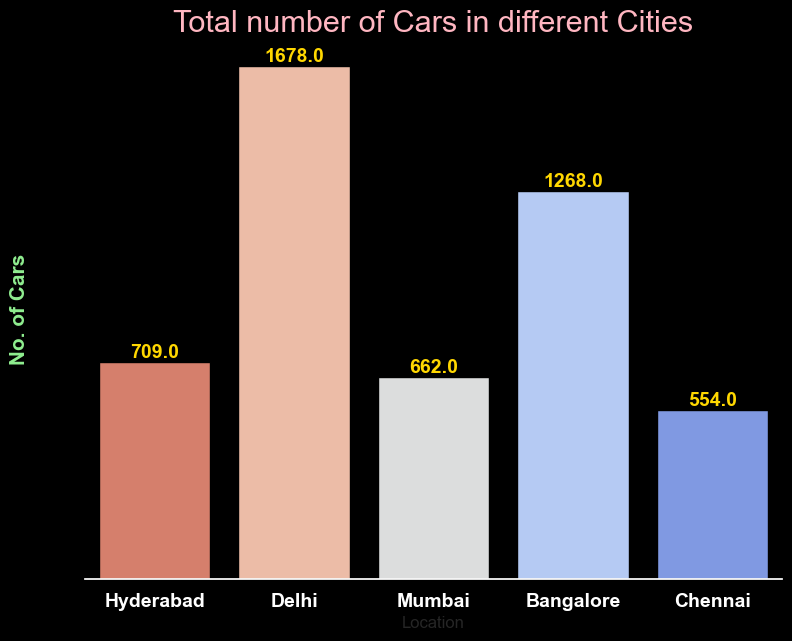

In [50]:
plt.figure(facecolor='black',figsize=(9,7))
sns.set(rc={'figure.figsize':(8,6)})
a = sns.countplot(x = 'Location',data=df,edgecolor='black',palette='coolwarm_r')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=14,color='gold',fontweight='bold')
plt.title("Total number of Cars in different Cities",fontsize=22,color='lightpink')
plt.xticks(rotation=0,fontsize=14,fontweight='bold',color='white')
plt.yticks(fontsize=12,fontweight='bold',color='black')
a.set_facecolor('black')
a.set_ylabel("No. of Cars", fontsize =15, color='lightgreen',fontweight='bold')
a.spines['left'].set_color('black')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('white')
a.spines['right'].set_color('black')
plt.grid(False)

### 2) Percentage of cars available for sale in different cities

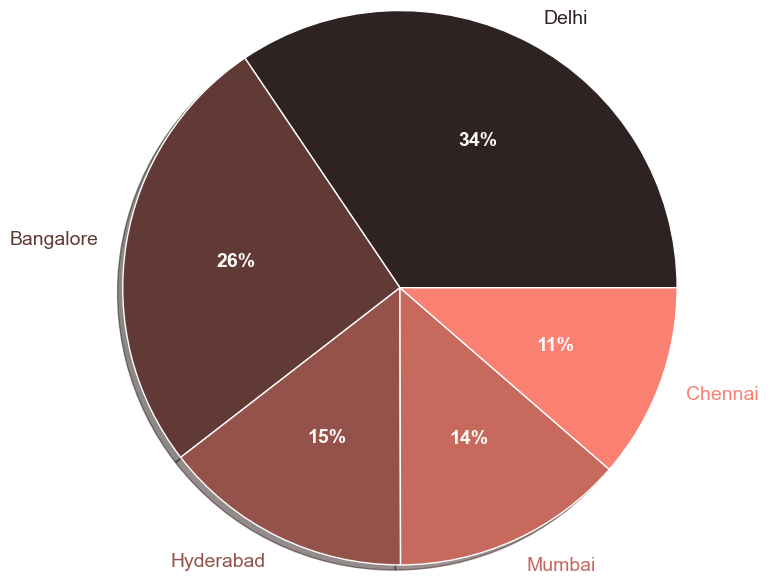

In [51]:
count = df['Location'].value_counts()
count = count.reset_index().rename(columns={'Location':'Count','index':'Location'})
colors = sns.set_palette('dark:salmon',5)
patches,text, pcts= plt.pie(x='Count',labels='Location',autopct='%1.0f%%',data=count,colors=colors,radius=1.5,shadow=True,
                    textprops={'fontsize': 14})
for i, patch in enumerate(patches):
    text[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='snow',fontweight='bold')
plt.show()

### 3) No. of different Brands in all Cities

In [52]:
brand_count = df['Car Brand'].value_counts().sort_values(ascending=False).reset_index().rename(
    columns = {'index':'Brand','Car Brand':'Count'})

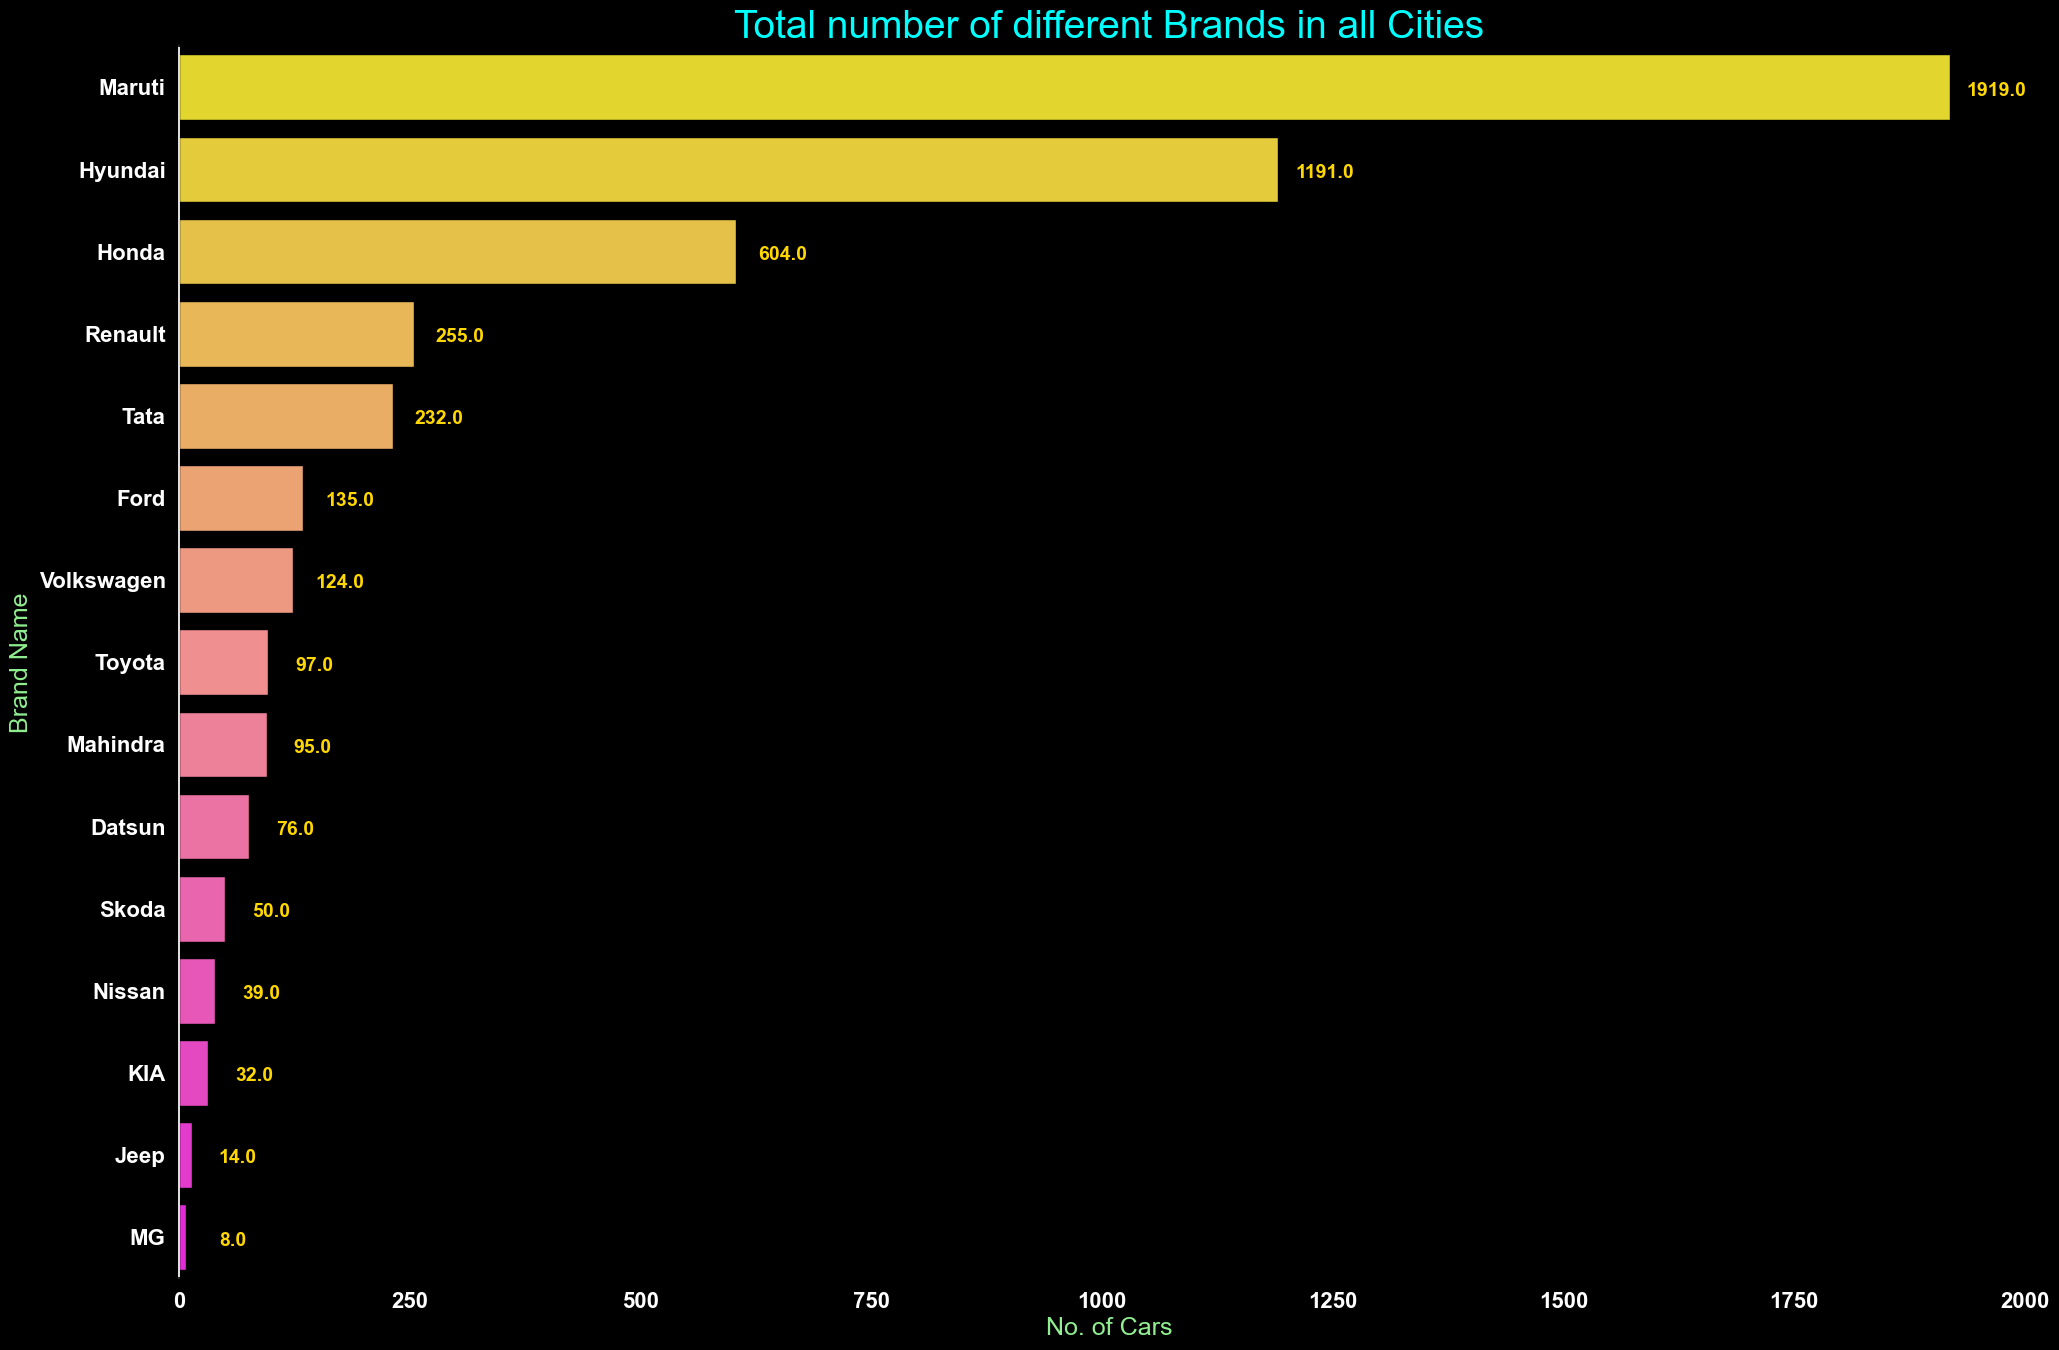

In [55]:
plt.figure(facecolor='black',figsize=(24,16))
sns.set(rc={'figure.figsize':(22,14)})
a = sns.barplot(y ='Brand',x='Count',data=brand_count,palette='spring_r',edgecolor='black')
plt.xticks(rotation=0,fontsize=16,fontweight='bold',color='white')
plt.yticks(fontsize=16,fontweight='bold',color='white')
for p in a.patches:
    width = p.get_width()
    plt.text(50+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',
             va='center',fontsize=14,color='gold',fontweight='bold')
a.set_xlabel("No. of Cars", fontsize = 18,color='lightgreen')
a.set_ylabel("Brand Name", fontsize =18, color='lightgreen')
plt.title("Total number of different Brands in all Cities",fontsize=28,color='cyan')
a.set_facecolor('black')
a.spines['left'].set_color('white')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
plt.grid(False)

### 4) Average Price of all the brands

In [56]:
avg_price = df.groupby(by=['Car Brand'])['Price'].mean().sort_values(ascending=False).reset_index().rename(
    columns={'Price':'Avg Price'})
avg_price['Avg Price'] = avg_price['Avg Price'].astype(int)

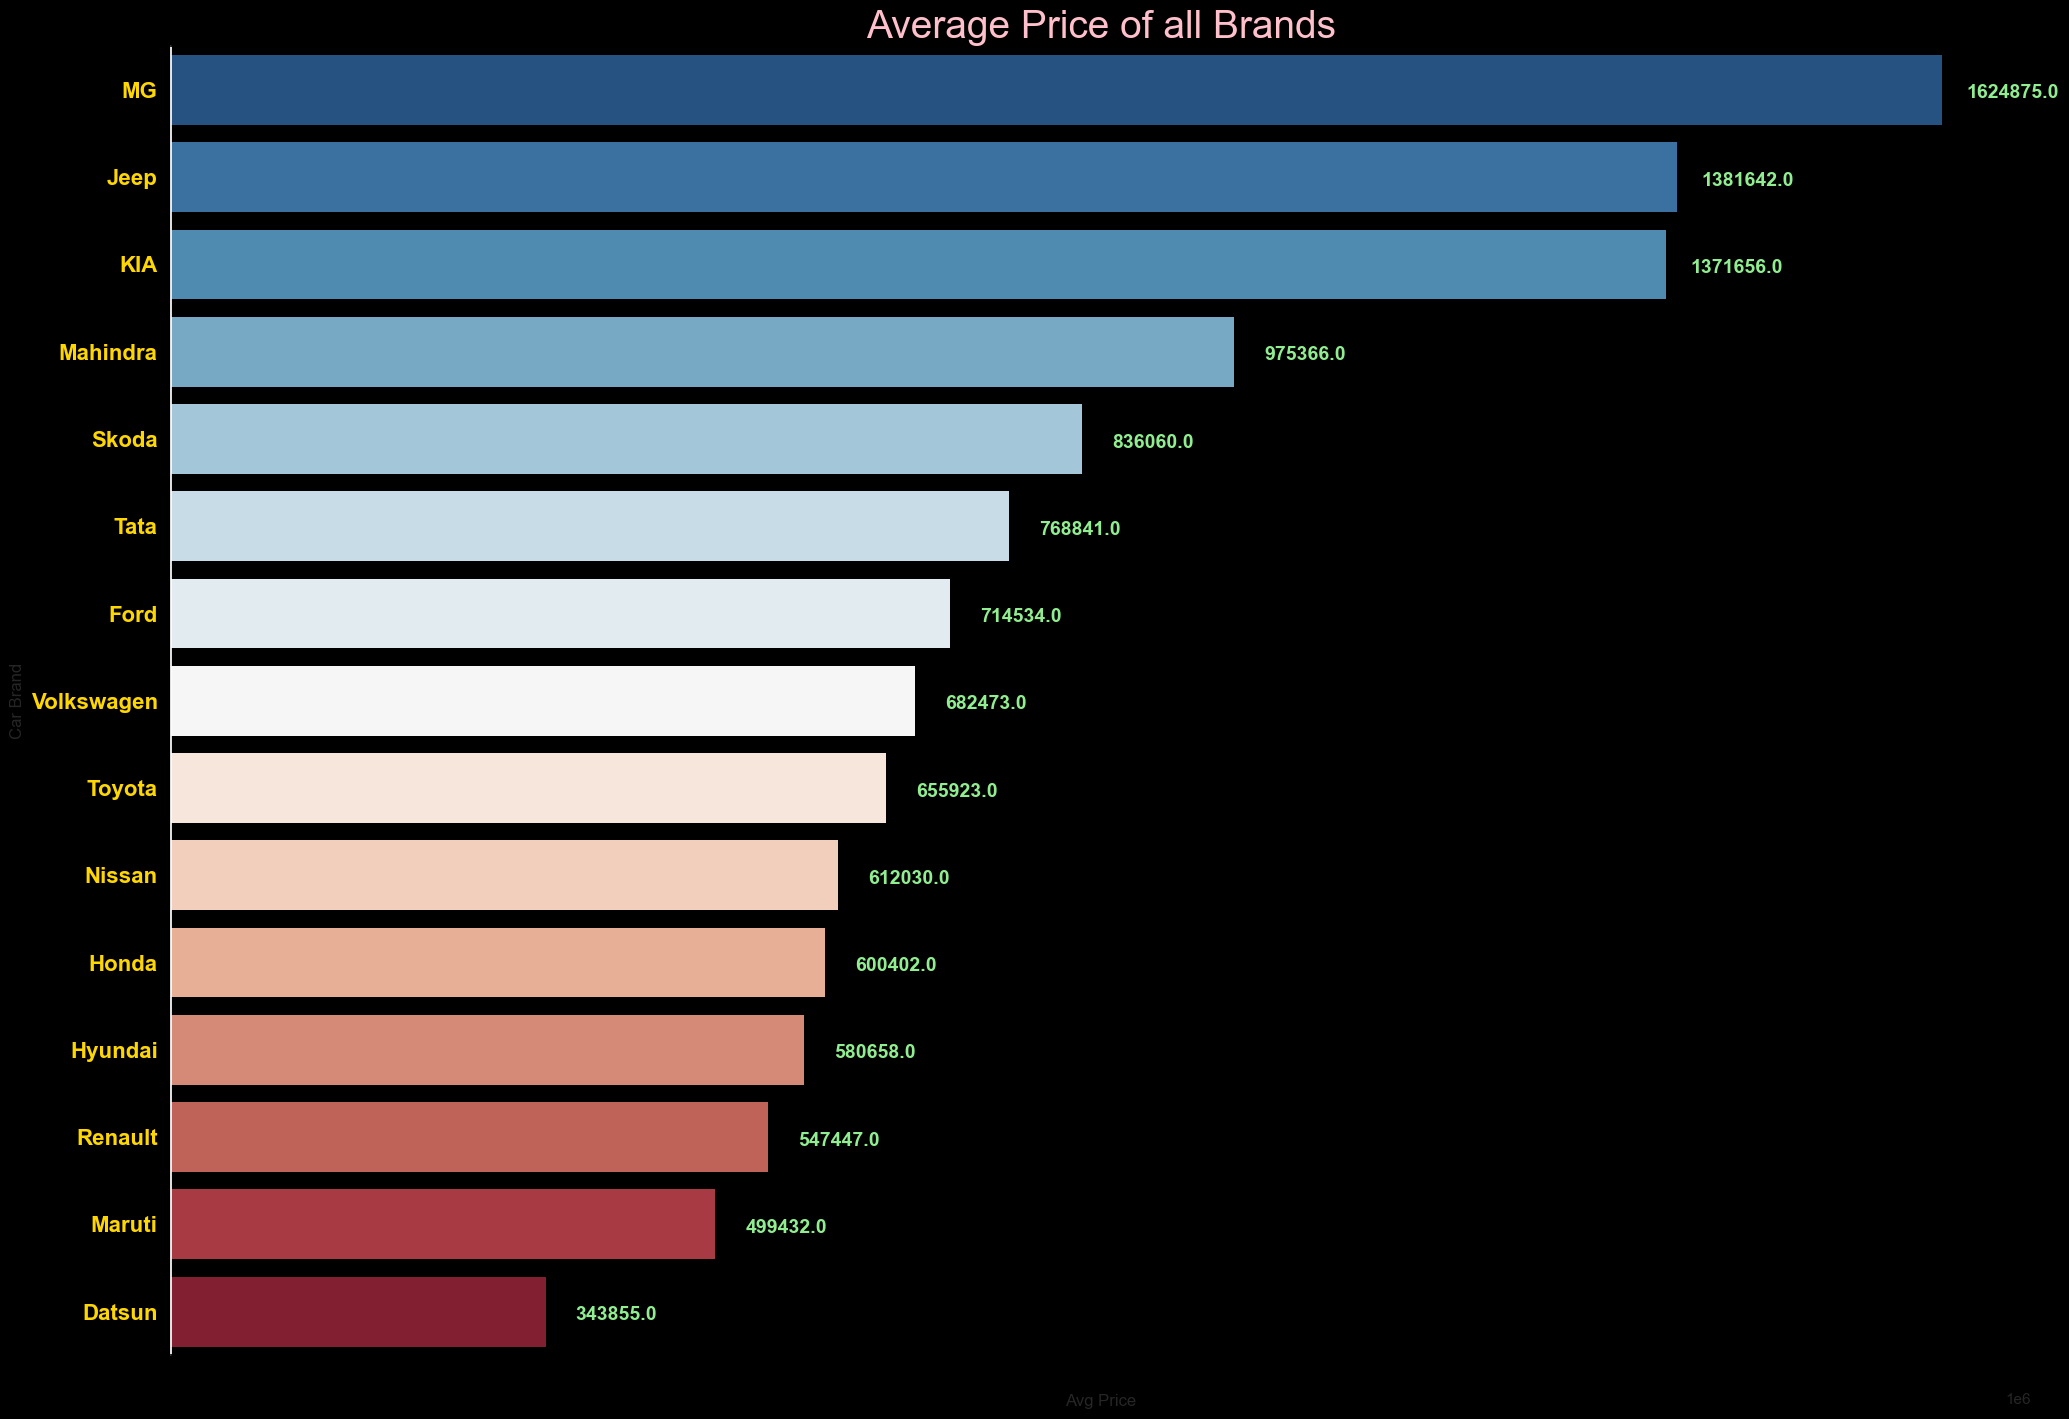

In [57]:
plt.figure(facecolor='black',figsize=(24,17))
sns.set(rc={'figure.figsize':(22,16)})
a = sns.barplot(y ='Car Brand',x='Avg Price',data=avg_price,palette='RdBu_r',edgecolor='none')
plt.xticks(rotation=0,fontsize=16,fontweight='bold',color='black')
plt.yticks(fontsize=16,fontweight='bold',color='gold')
for p in a.patches:
    width = p.get_width()
    plt.text(65000+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',
             va='center',fontsize=14,fontweight='bold',color='lightgreen')
plt.title("Average Price of all Brands",fontsize=28,color='pink')
a.set_facecolor('black')
a.spines['left'].set_color('white')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
plt.grid(False)

### 5) Total no. of different Car Brands in Hyderabad

In [58]:
hyd_city = df.loc[(df['Location'] == 'Hyderabad')]
hyd_brands = hyd_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

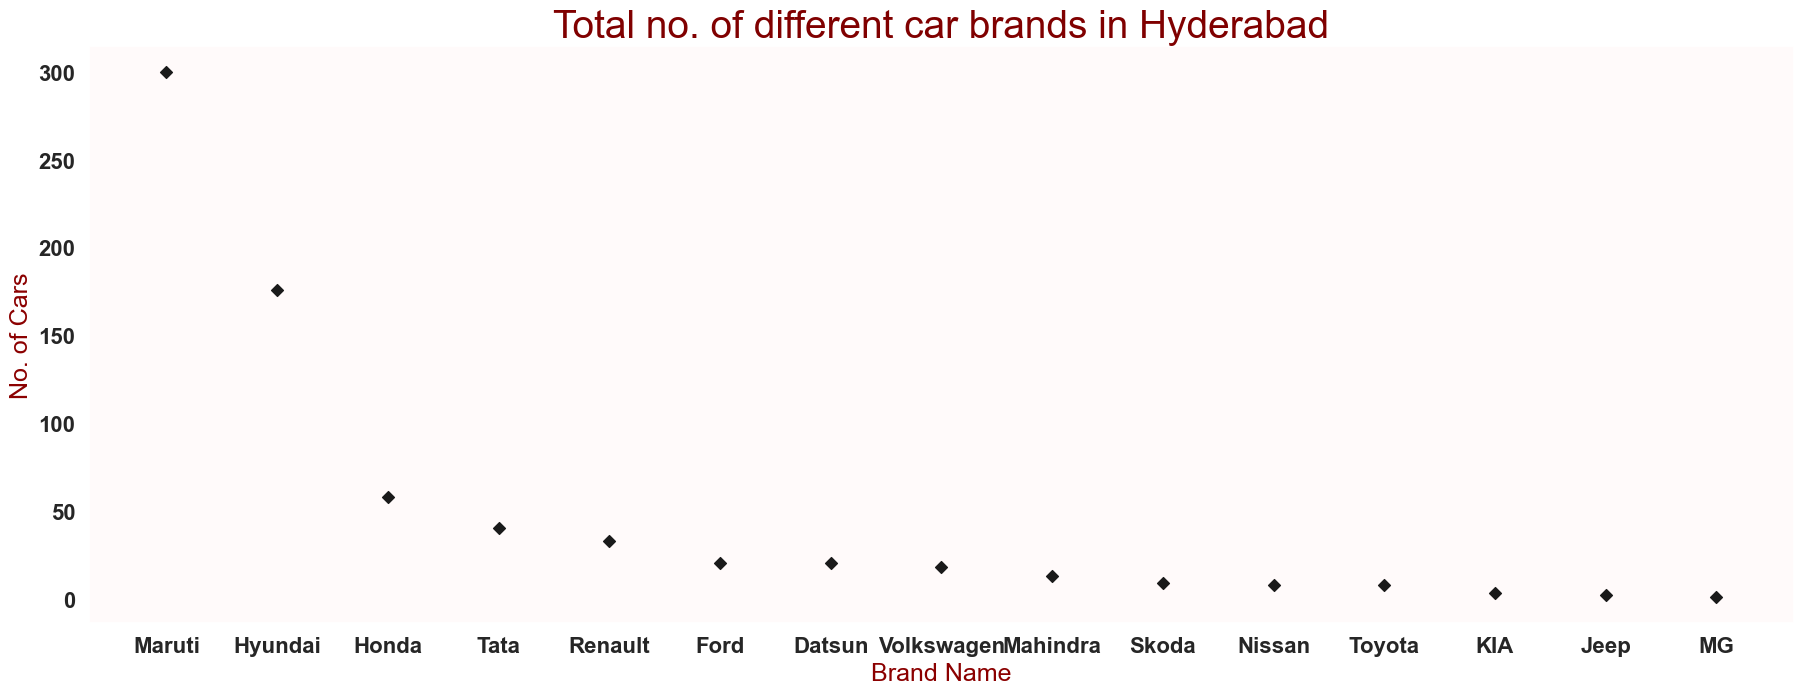

In [59]:
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('snow')
plt.scatter('Brand','Count',data=hyd_brands,color='k',marker='D')
plt.xticks(rotation=0,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Hyderabad",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

### 6) Total no. of different Car Brands in Delhi

In [60]:
delhi_city = df.loc[(df['Location'] == 'Delhi')]
delhi_brands = delhi_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

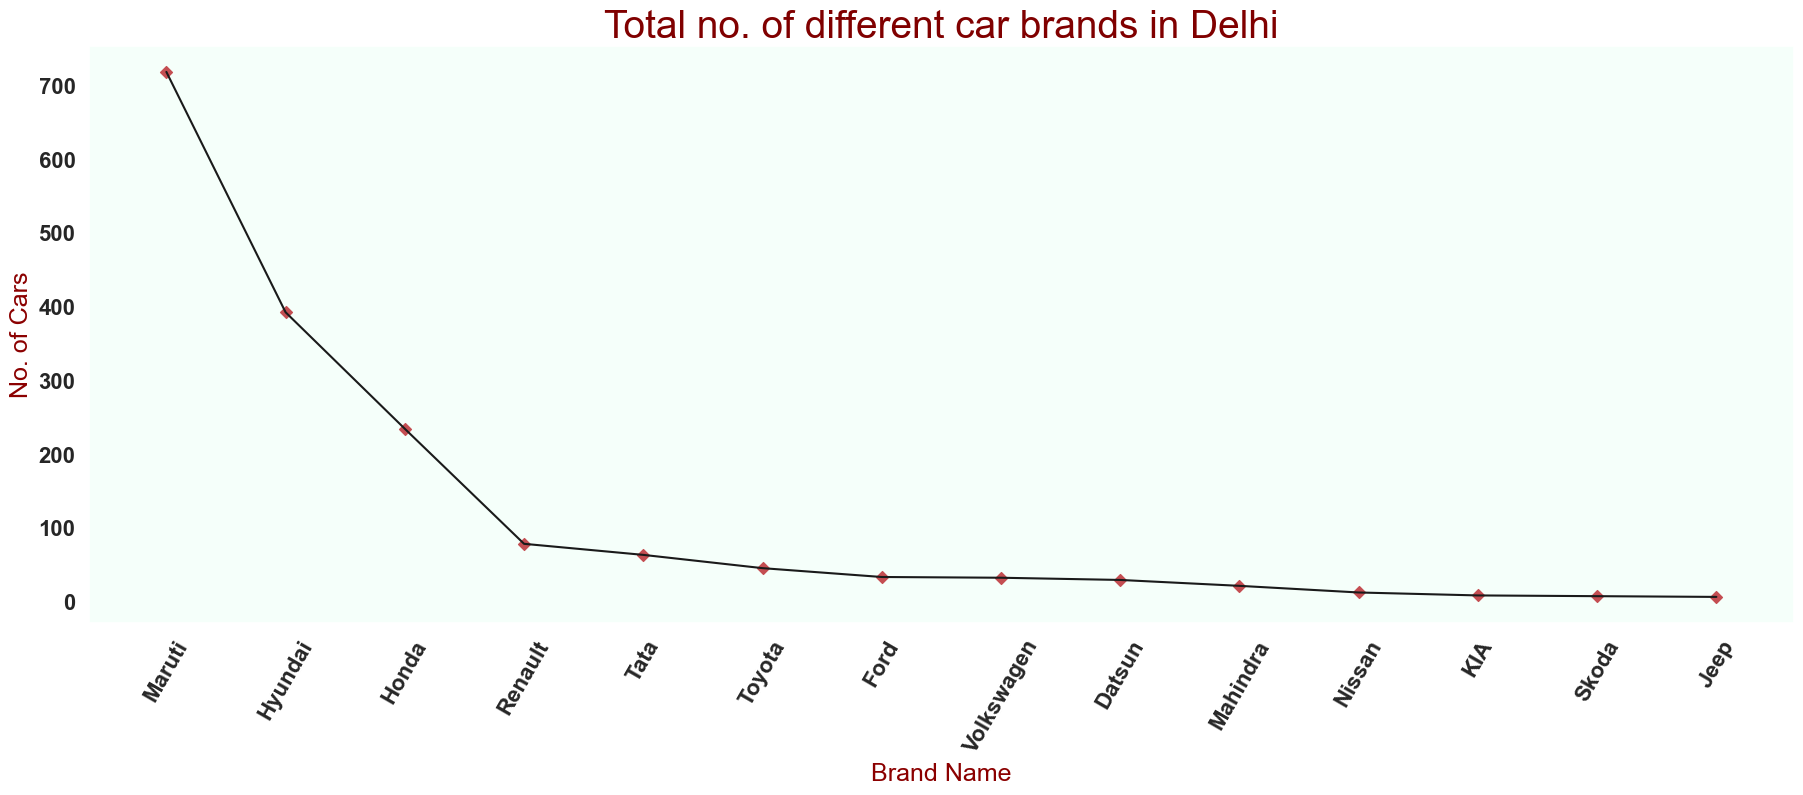

In [61]:
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Brand','Count',data=delhi_brands,color='k')
plt.scatter('Brand','Count',data=delhi_brands,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands in Delhi",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.grid(False)

### 7) Total no. of different Car Brands in Mumbai

In [62]:
mumbai_city = df.loc[(df['Location'] == 'Mumbai')]
mumbai_brands = mumbai_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

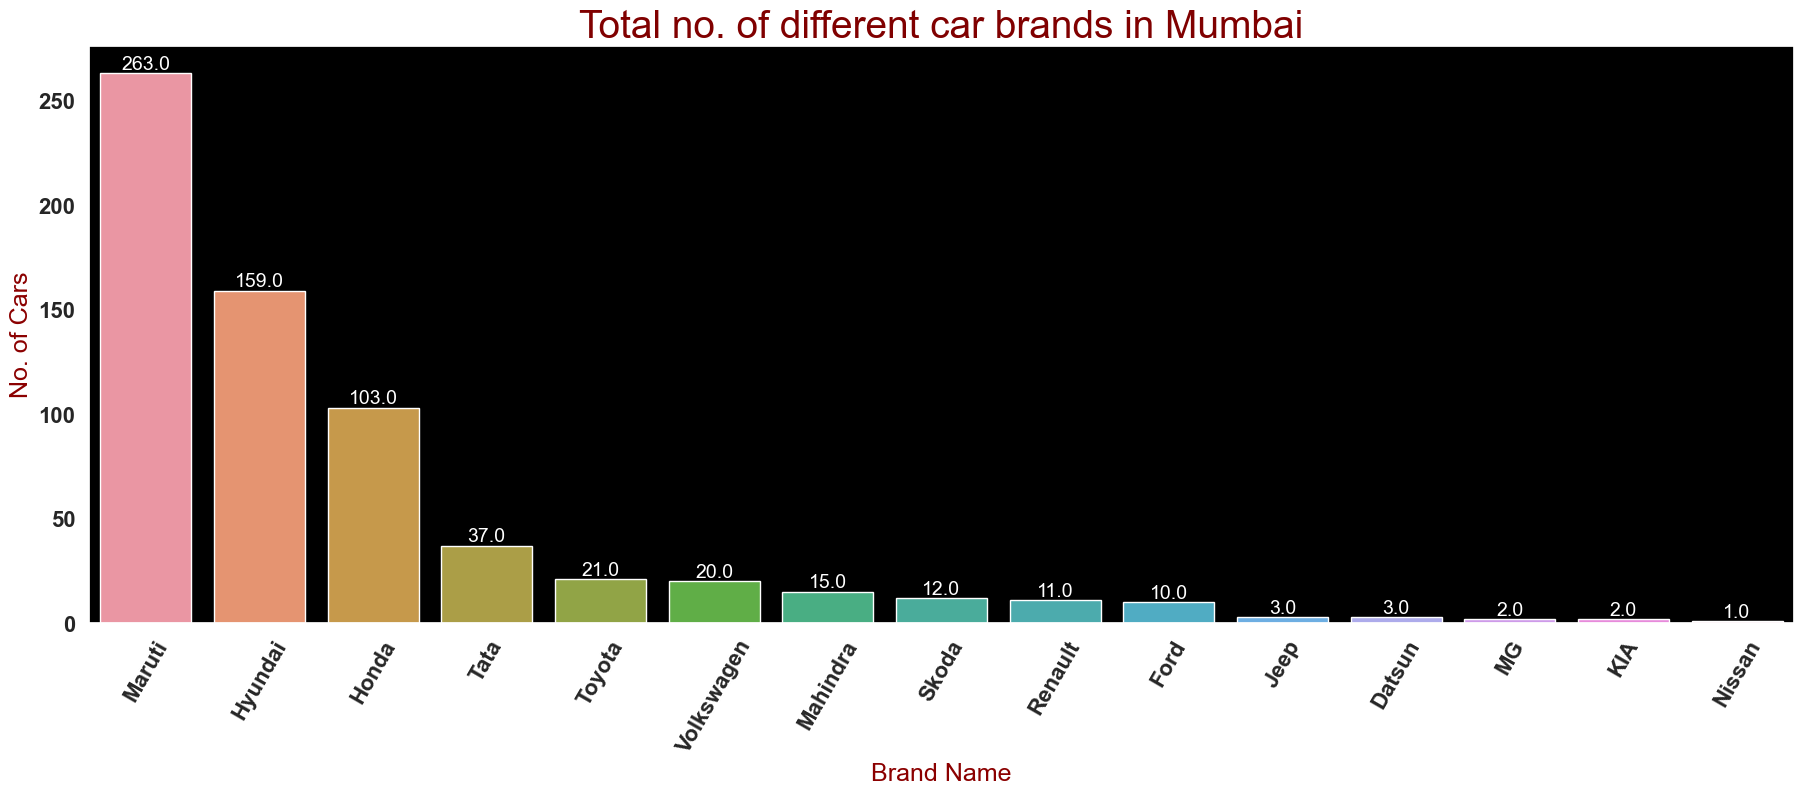

In [63]:
sns.set(rc={'figure.figsize':(22,7.5)})
a = sns.barplot(x ='Brand',y='Count',data=mumbai_brands)
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=14,color='white')
a.set_xlabel("Brand Name", fontsize = 18,color='darkred')
a.set_ylabel("No. of Cars", fontsize =18, color='darkred')
plt.title("Total no. of different car brands in Mumbai",fontsize=28,color='maroon')
a.set_facecolor('black')
plt.grid(False)

### 8) Total no. of different Car Brands in Bangalore

In [64]:
bangalore_city = df.loc[(df['Location'] == 'Bangalore')]
bangalore_brands = bangalore_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

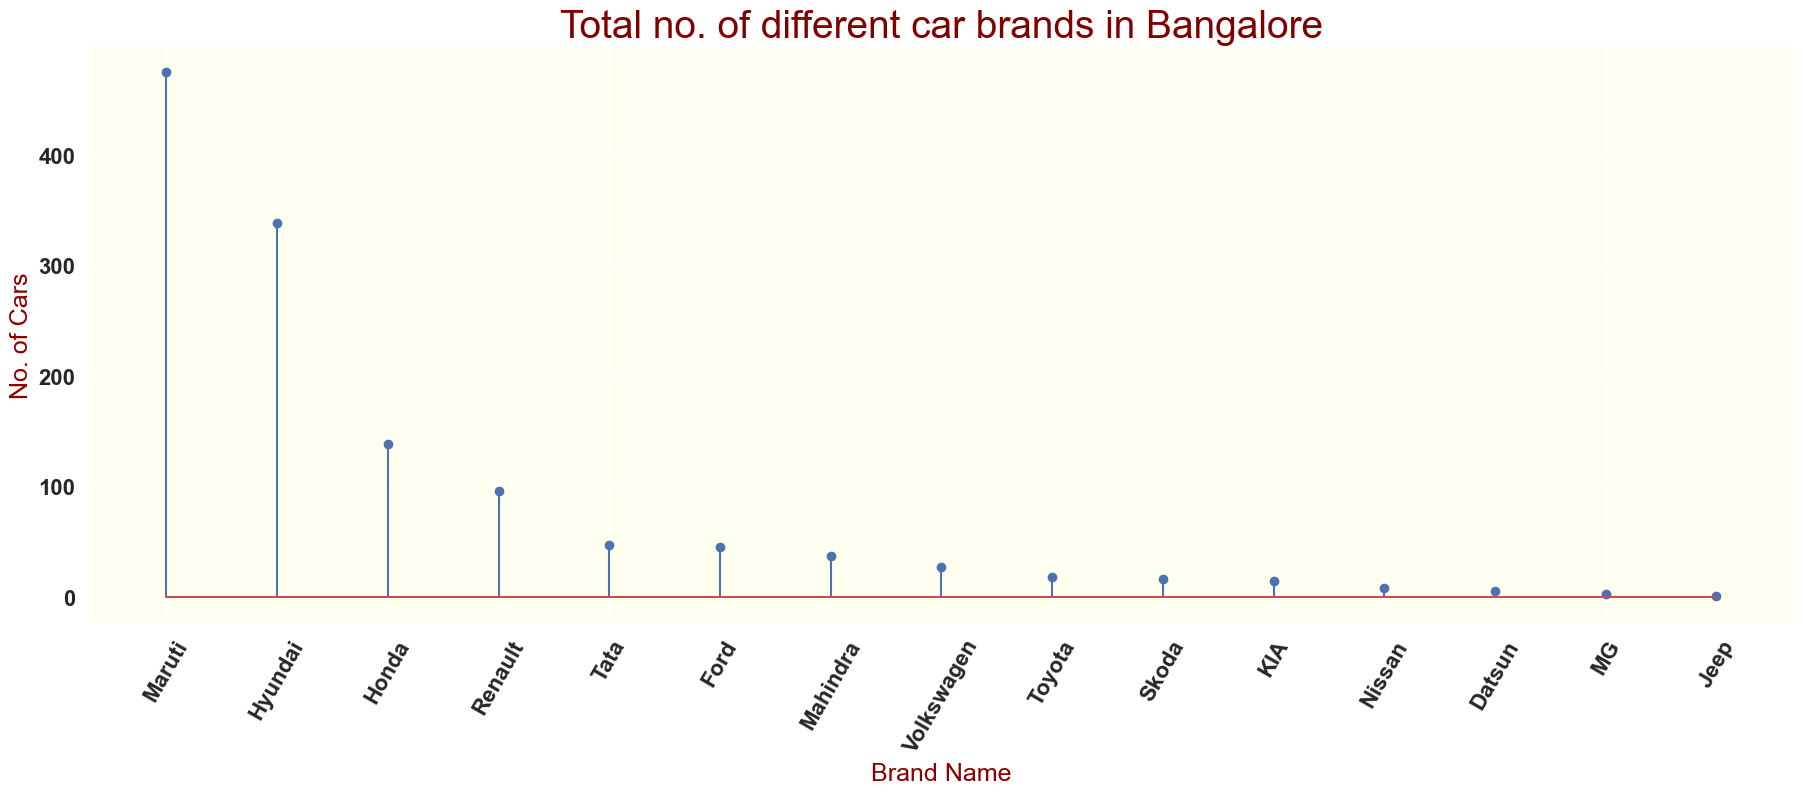

In [65]:
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('ivory')
plt.stem('Brand','Count',data=bangalore_brands)
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.title("Total no. of different car brands in Bangalore",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("No. of Cars", fontsize =18, color='darkred')
plt.show()

### 9) Total no. of different Car Brands in Chennai

In [66]:
chennai_city = df.loc[(df['Location'] == 'Chennai')]
chennai_brands = chennai_city['Car Brand'].value_counts().sort_values(ascending = True).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

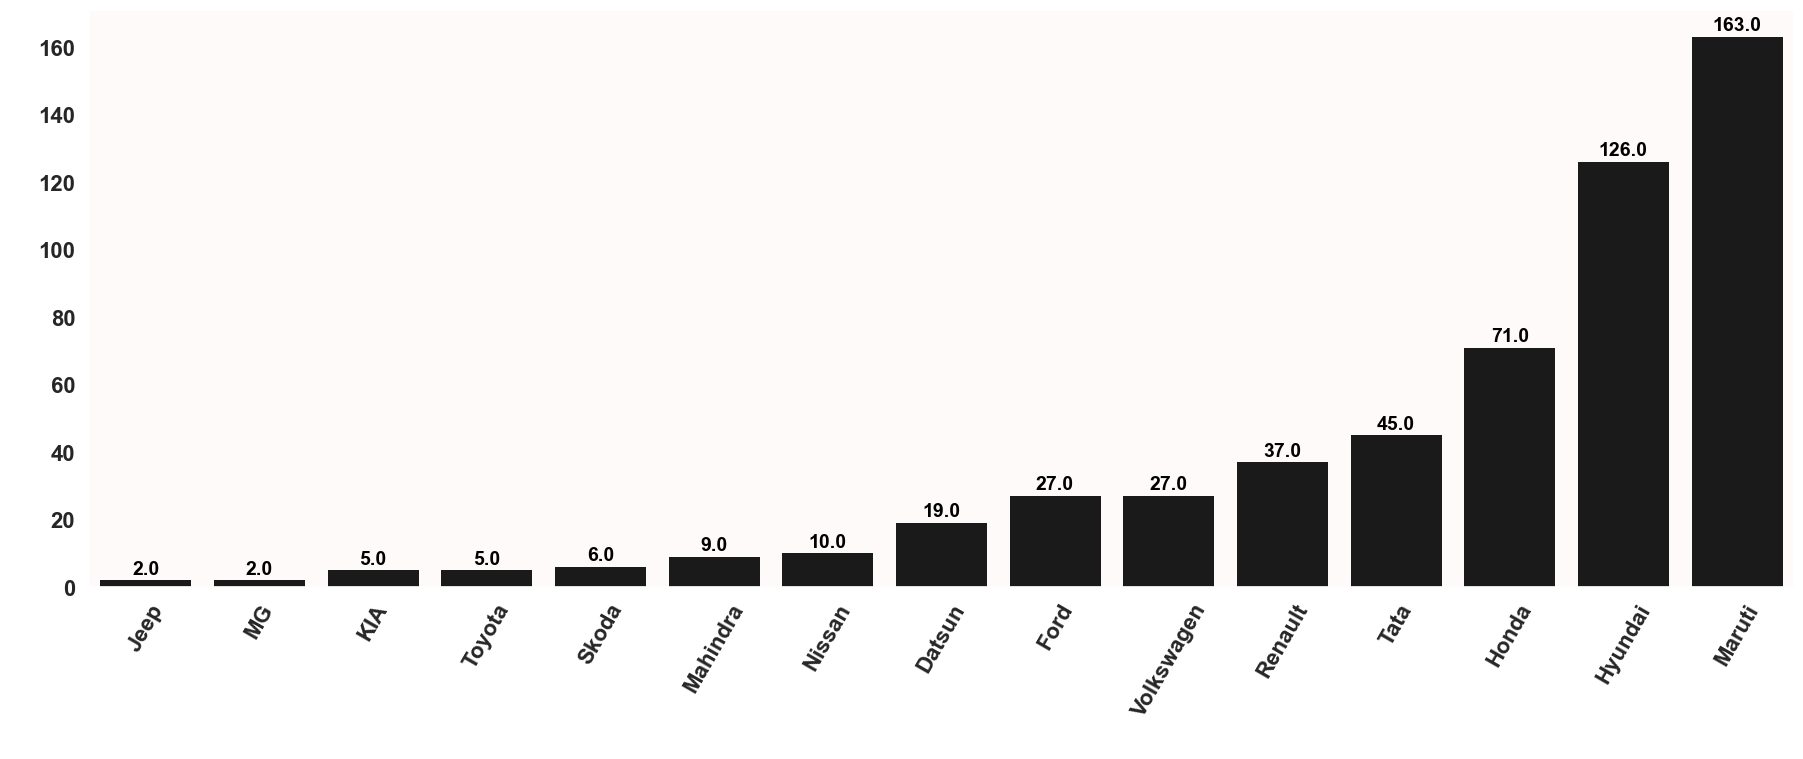

In [67]:
sns.set(rc={'figure.figsize':(22,7.5)})
a = sns.barplot(x ='Brand',y='Count',data=chennai_brands,hatch=('*'),color='k',edgecolor='none')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,8),textcoords='offset points',fontsize=14,color='black',fontweight='bold')
a.set_xlabel("Brand Name", fontsize = 18,color='white')
a.set_ylabel("No. of Cars", fontsize =18, color='white')
#plt.title("Total no. of different car brands in Chennai",fontsize=28,color='maroon')
a.set_facecolor('snow')
plt.grid(False)

### 10) Number of Cars based on Fuel type in all cities

In [68]:
fuel_gear = df.groupby(by=['Fuel'])['Location'].count().sort_values(ascending=True).reset_index().rename(
    columns={'Location':'Count'})
fuel_gear

,Fuel,Count
0,LPG,1
1,CNG,254
2,Diesel,602
3,Petrol,4014


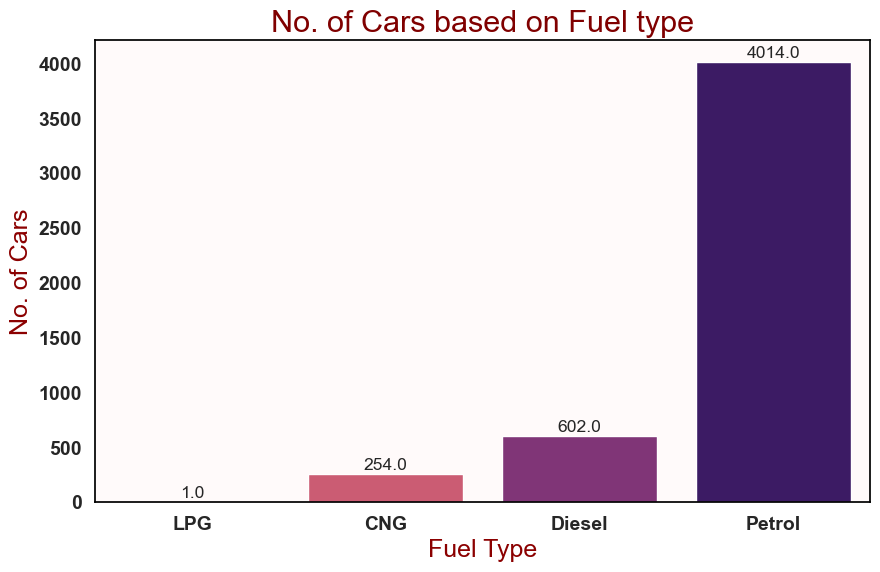

In [69]:
sns.set(rc={'figure.figsize':(10,6)})
a = sns.barplot(x ='Fuel',y='Count',data=fuel_gear,palette='magma_r')
plt.xticks(rotation=0,fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=12.6)
a.set_xlabel("Fuel Type", fontsize = 18,color='darkred')
a.set_ylabel("No. of Cars", fontsize =18, color='darkred')
plt.title("No. of Cars based on Fuel type",fontsize=22,color='maroon')
a.set_facecolor('snow')
a.spines['left'].set_color('black')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
plt.grid(False)

### 11) No. of Cars based on Fuel type in different Cities

In [70]:
fuel_location = df.groupby(by=['Location','Fuel'])['Gear'].count().reset_index().rename(
    columns={'Gear':'Count','Count':'Fuel'})
fuel_location = fuel_location.sort_values(by=['Location','Count'],ascending=True).reset_index()
fuel_location = fuel_location.drop('index',axis=1)
fuel_location

,Location,Fuel,Count
0,Bangalore,CNG,5
1,Bangalore,Diesel,204
2,Bangalore,Petrol,1059
3,Chennai,CNG,5
4,Chennai,Diesel,82
5,Chennai,Petrol,467
6,Delhi,Diesel,122
7,Delhi,CNG,164
8,Delhi,Petrol,1392
9,Hyderabad,LPG,1


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


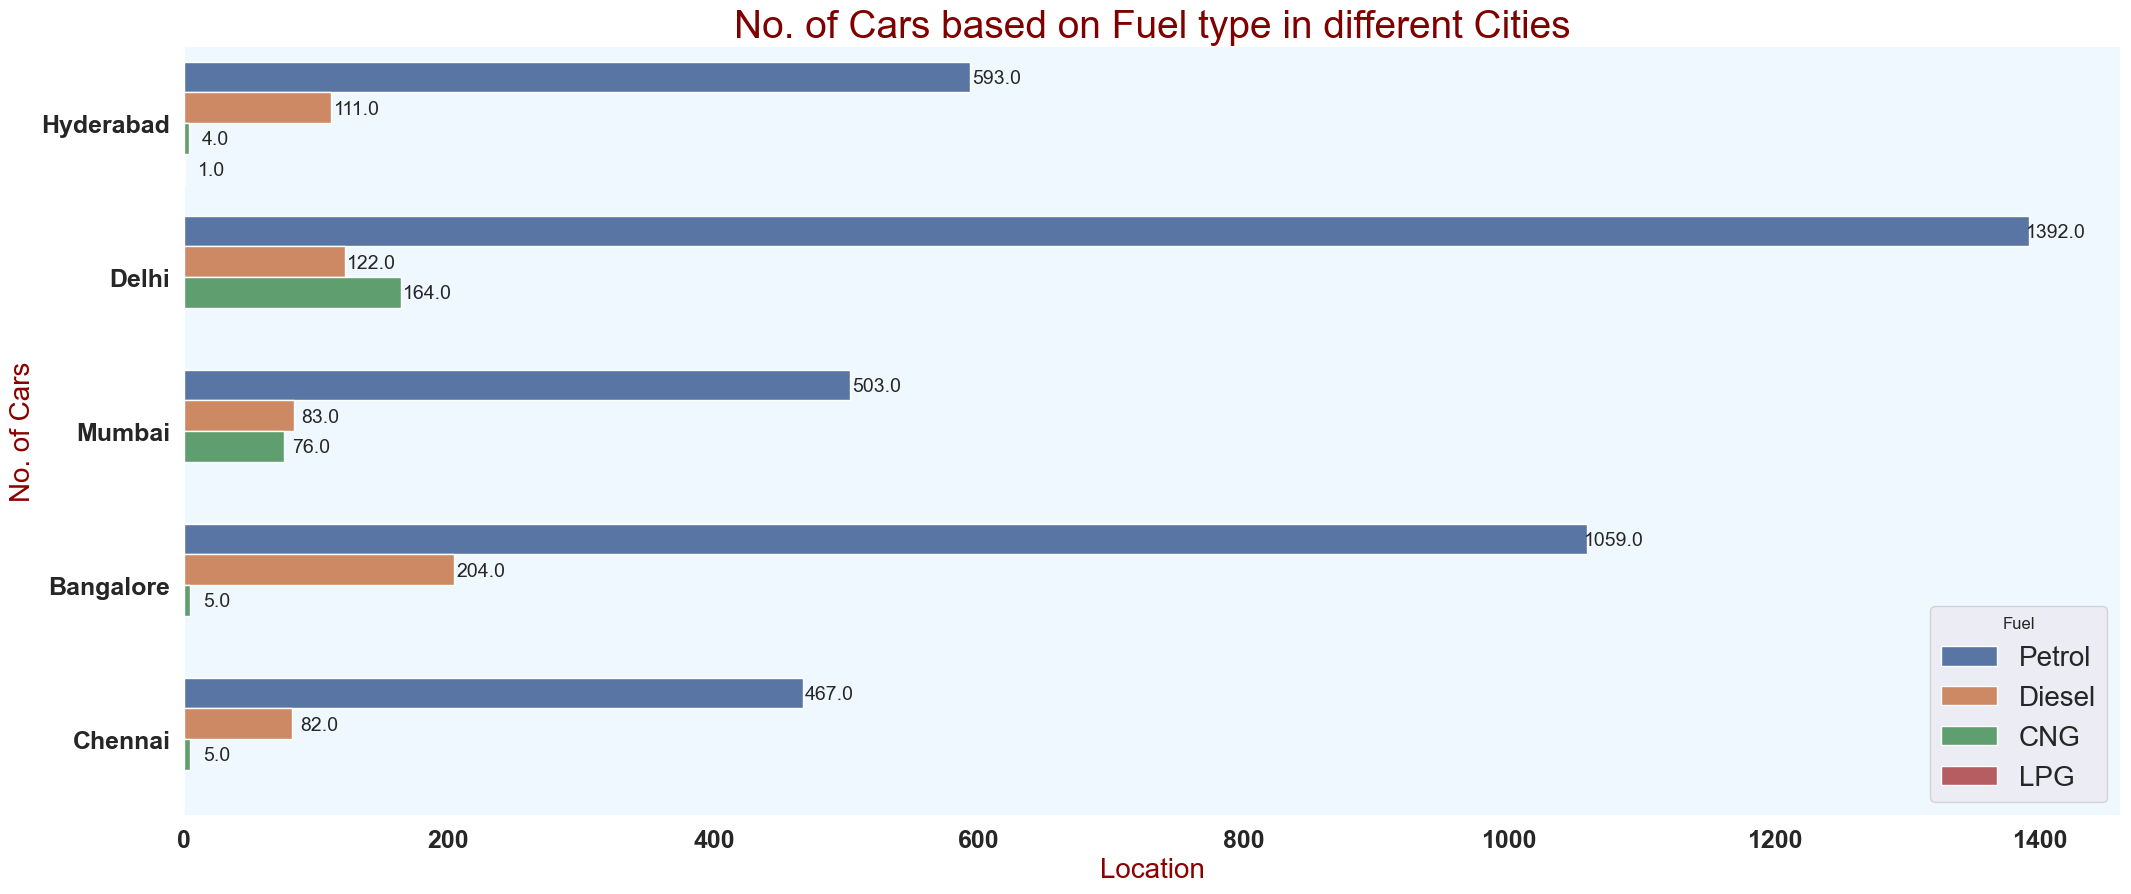

In [71]:
sns.set(rc={'figure.figsize':(25,10)})
a = sns.countplot(y = 'Location',hue='Fuel',data=df)
plt.xticks(rotation=0,fontsize=18,fontweight='bold')
plt.yticks(fontsize=18,fontweight='bold')
for p in a.patches:
    width = p.get_width()
    plt.text(20+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',va='center',fontsize=14)
a.set_xlabel("Location", fontsize = 20,color='darkred')
a.set_ylabel("No. of Cars", fontsize =20, color='darkred')
plt.title("No. of Cars based on Fuel type in different Cities",fontsize=28,color='maroon')
a.set_facecolor('aliceblue')
plt.legend(loc='lower right',title='Fuel',prop={'size': 20})
a.grid(False)

### 12) No. of cars in different Cities based on Model Year

In [72]:
fuel_location = df.groupby(by=['Location','Model Year'])['Gear'].count().reset_index().rename(
    columns={'Gear':'Count','Count':'Model Year'})
fuel_location = fuel_location.sort_values(by=['Location','Count'],ascending=True).reset_index()
fuel_location = fuel_location.drop('index',axis=1)

posx and posy should be finite values
posx and posy should be finite values


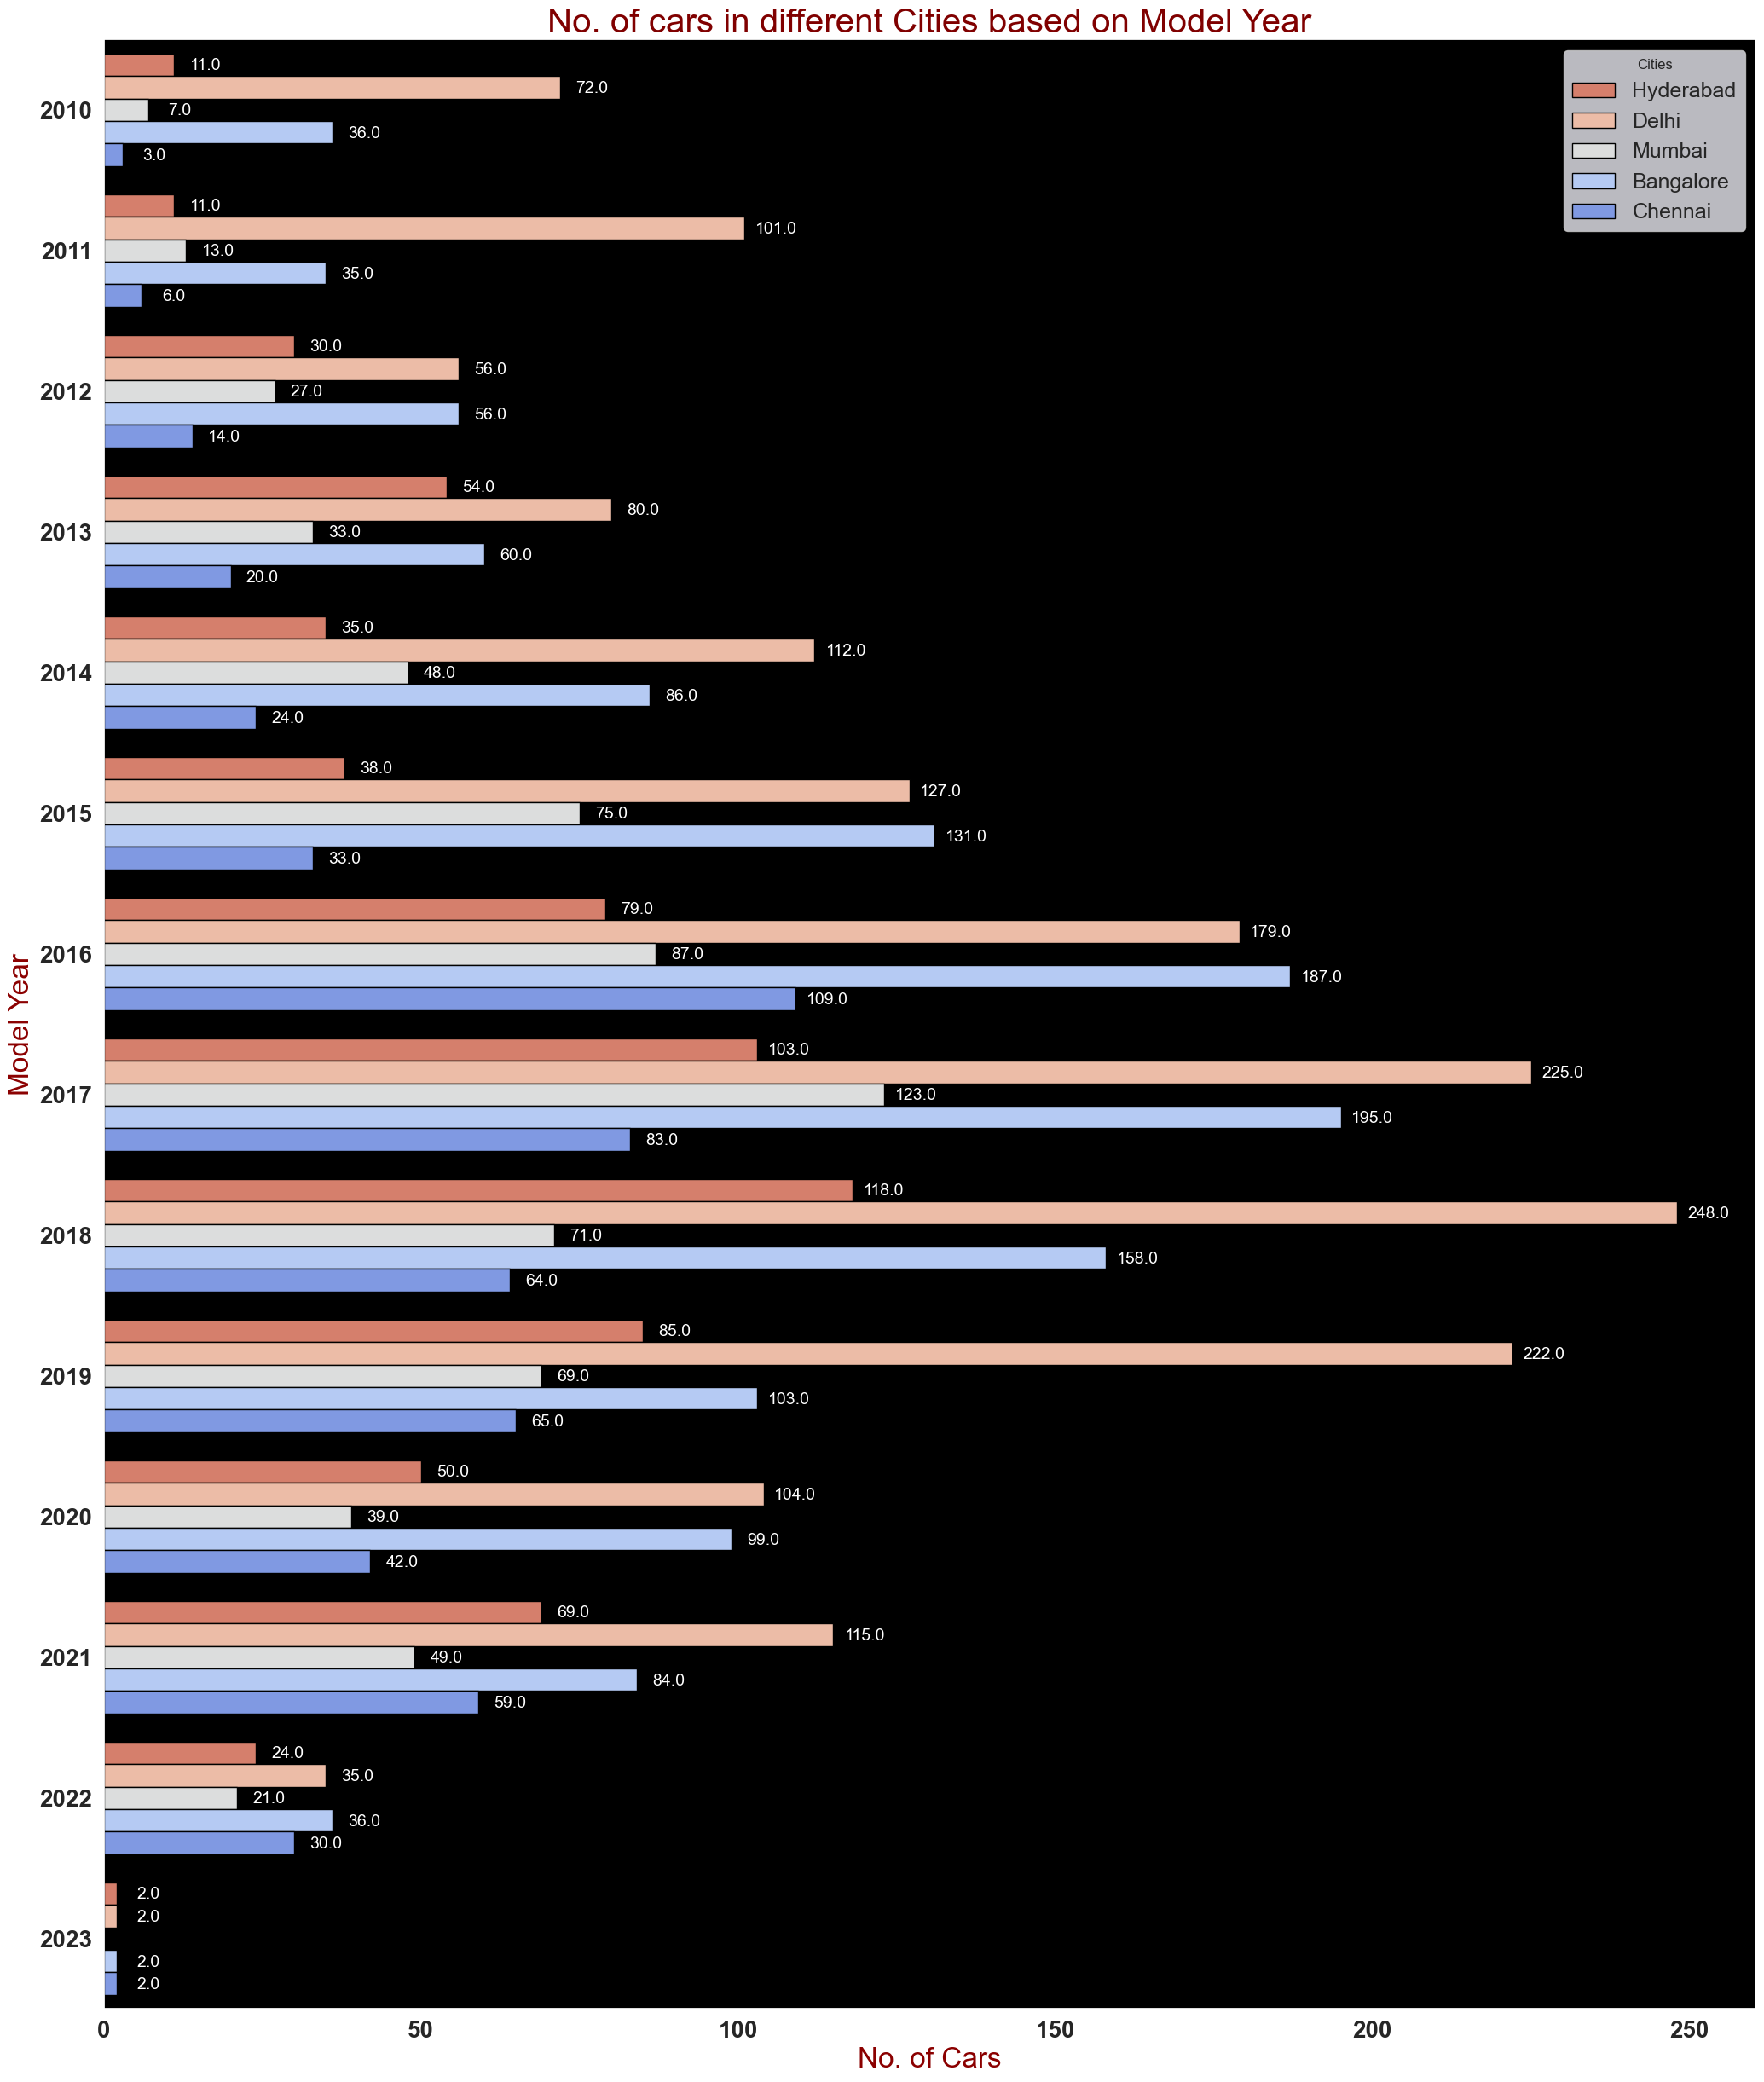

In [75]:
sns.set(rc={'figure.figsize':(25,30)})
a = sns.countplot(y = 'Model Year',hue='Location',data=df,edgecolor='black',palette='coolwarm_r')
plt.xticks(rotation=0,fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
for p in a.patches:
    width = p.get_width()
    plt.text(5+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',va='center',fontsize=14,
            color='white')
a.set_ylabel("Model Year", fontsize = 24,color='darkred')
a.set_xlabel("No. of Cars", fontsize =24, color='darkred')
plt.title("No. of cars in different Cities based on Model Year",fontsize=29,color='maroon')
a.set_facecolor('black')
plt.legend(loc='upper right',title='Cities',prop={'size': 18})
a.grid(False)

### 13) No. of Cars in different cities based on Gear

In [76]:
location_gear = df.groupby(by=['Location','Gear'])['Ownership'].count().reset_index().rename(
    columns={'Ownership':'Count'})
location_gear

,Location,Gear,Count
0,Bangalore,Automatic,339
1,Bangalore,Manual,929
2,Chennai,Automatic,119
3,Chennai,Manual,435
4,Delhi,Automatic,265
5,Delhi,Manual,1413
6,Hyderabad,Automatic,155
7,Hyderabad,Manual,554
8,Mumbai,Automatic,190
9,Mumbai,Manual,472


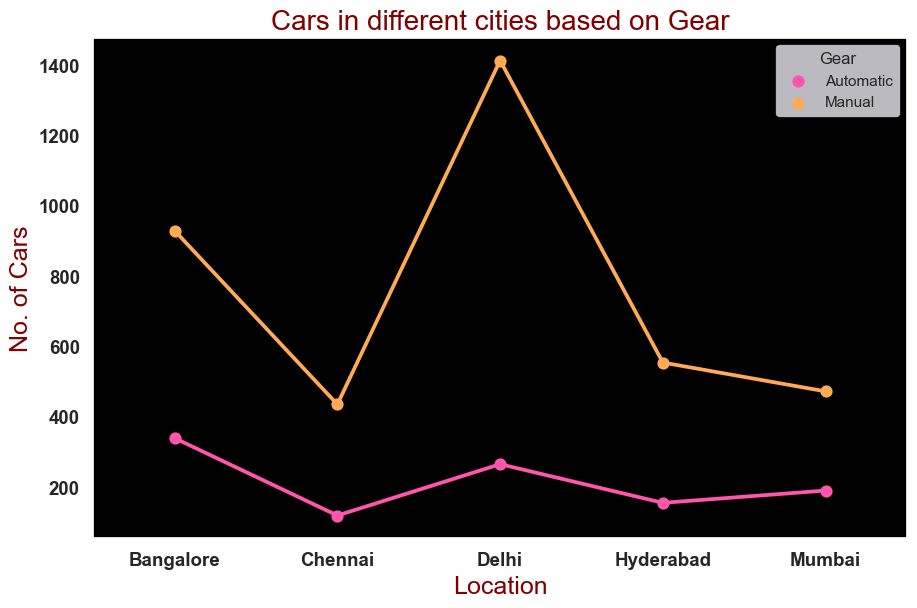

In [77]:
sns.set(rc={'figure.figsize':(10.5,6.5)})
plt.xticks(rotation=0,fontsize=13.5,fontweight='bold')
plt.yticks(fontsize=13.5,fontweight='bold')
a = sns.pointplot(x='Location',y='Count',hue='Gear',data=location_gear,palette='spring')
a.set_facecolor('black')
a.set_xlabel("Location", fontsize = 18,color='maroon')
a.set_ylabel("No. of Cars", fontsize =18, color='maroon')
plt.title("Cars in different cities based on Gear",fontsize=20,color='maroon')
plt.grid(False)

### 14) No. of Cars in different cities based on Ownership

In [79]:
location_owner = df.groupby(by=['Location','Ownership'])['Gear'].count().reset_index().rename(
    columns={'Gear':'Count'})
location_owner

,Location,Ownership,Count
0,Bangalore,1,814
1,Bangalore,2,405
2,Bangalore,3,49
3,Chennai,1,354
4,Chennai,2,173
5,Chennai,3,27
6,Delhi,1,1270
7,Delhi,2,381
8,Delhi,3,27
9,Hyderabad,1,475


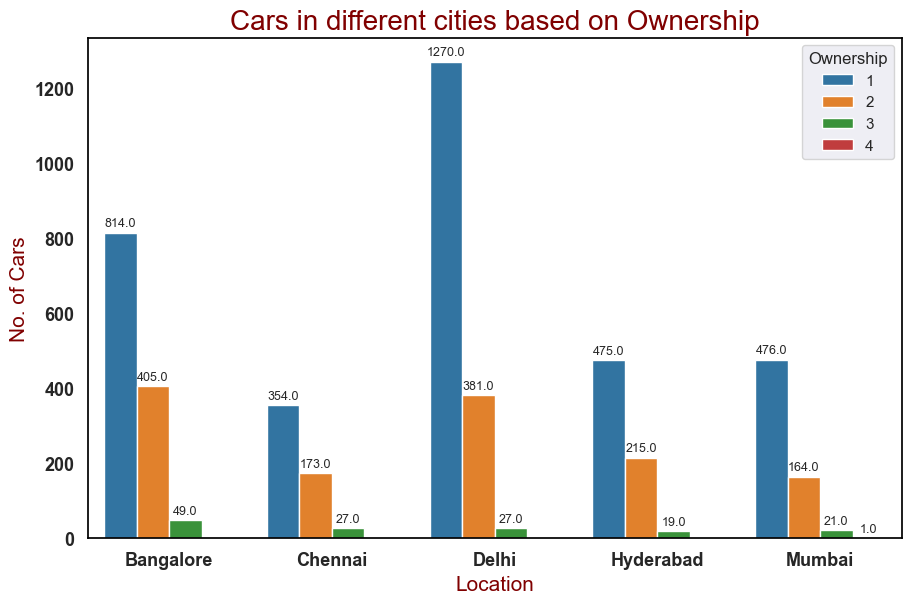

In [80]:
sns.set(rc={'figure.figsize':(10.5,6.5)})
a = sns.barplot(x='Location',y='Count',data=location_owner,hue='Ownership',palette='tab10')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=9)
a.set_facecolor('white')
a.set_xlabel("Location", fontsize = 15,color='maroon')
a.set_ylabel("No. of Cars", fontsize =15, color='maroon')
plt.title("Cars in different cities based on Ownership",fontsize=20,color='maroon')
plt.xticks(rotation=0,fontsize=13,fontweight='bold')
plt.yticks(fontsize=13,fontweight='bold')
a.spines['left'].set_color('black')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
a.grid(False)

### 15) Average Price, EMI, Driven(Kms) based on Fuel type in Bangalore

In [81]:
models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
bangalore = models[models['Location']=='Bangalore']
bangalore

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
0,Bangalore,CNG,448600,2017,37118,1,8770
1,Bangalore,Diesel,800253,2016,74377,1,15419
2,Bangalore,Petrol,600962,2016,49363,1,11659


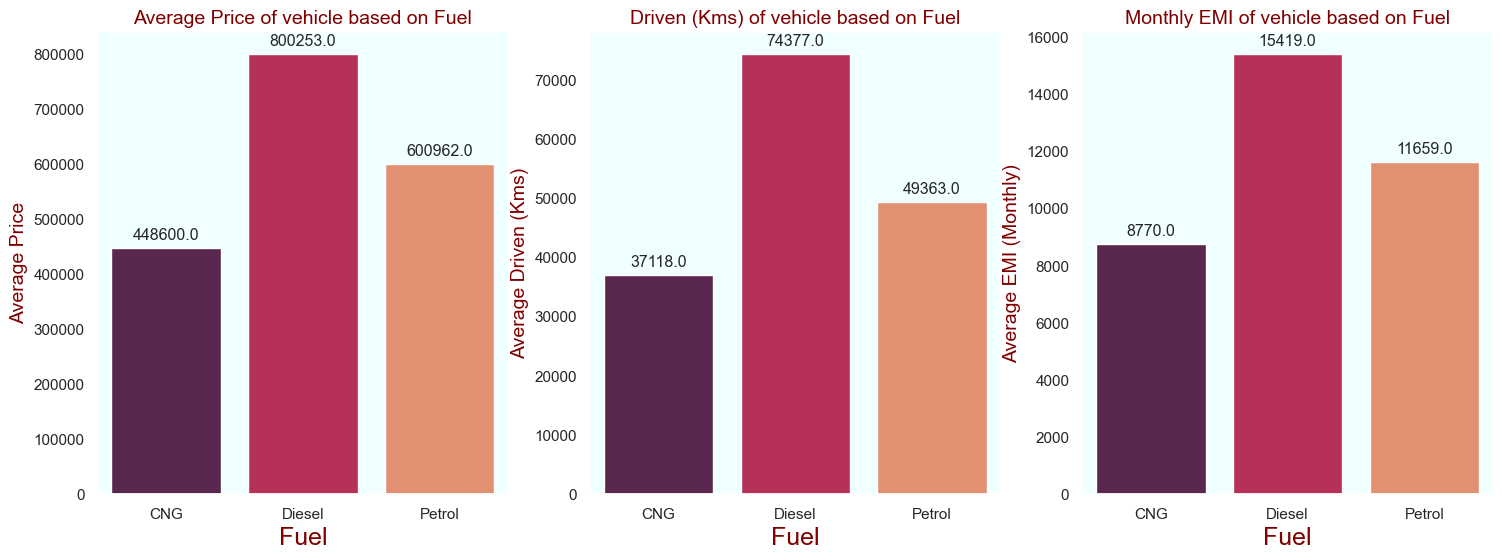

In [82]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=bangalore,palette='rocket',ax =axes[0])
a.set_facecolor('azure')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=bangalore,palette='rocket',ax =axes[1])
b.set_facecolor('azure')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=bangalore,palette='rocket',ax =axes[2])
c.set_facecolor('azure')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
a.grid(False)
b.grid(False)
c.grid(False)

### 16) Average Price, EMI, Driven(Kms) based on Fuel type in Chennai

In [83]:
models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
chennai = models[models['Location']=='Chennai']
chennai

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
3,Chennai,CNG,688800,2020,41246,1,13373
4,Chennai,Diesel,826854,2017,72374,1,15929
5,Chennai,Petrol,592824,2017,55040,1,11511


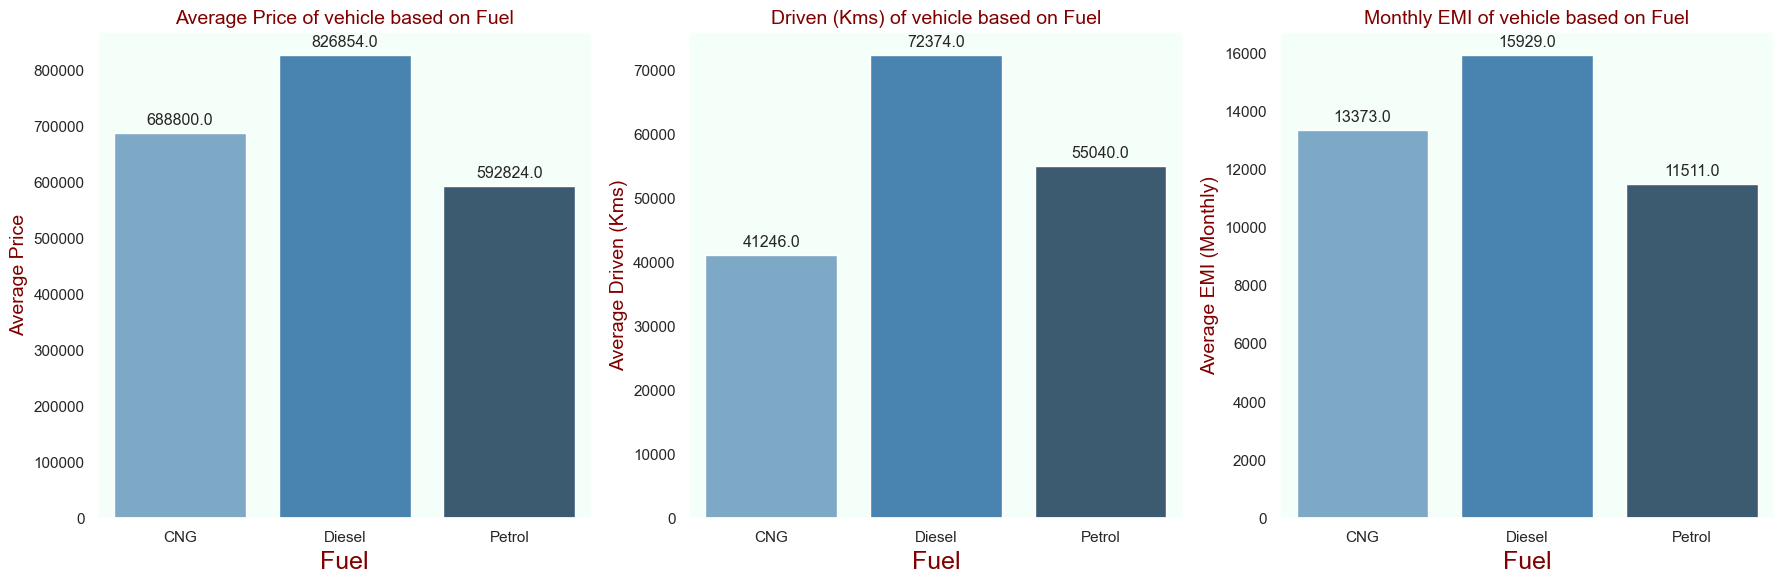

In [84]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=chennai,palette='Blues_d',ax =axes[0])
a.set_facecolor('mintcream')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=chennai,palette='Blues_d',ax =axes[1])
b.set_facecolor('mintcream')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=chennai,palette='Blues_d',ax =axes[2])
c.set_facecolor('mintcream')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.tight_layout()
a.grid(False)
b.grid(False)
c.grid(False)

### 17) Average Price, EMI, Driven(Kms) based on Fuel type in Delhi

In [85]:
models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
delhi = models[models['Location']=='Delhi']
delhi

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
6,Delhi,CNG,465002,2017,64617,1,9087
7,Delhi,Diesel,823836,2018,66966,1,15871
8,Delhi,Petrol,484052,2016,50804,1,9419


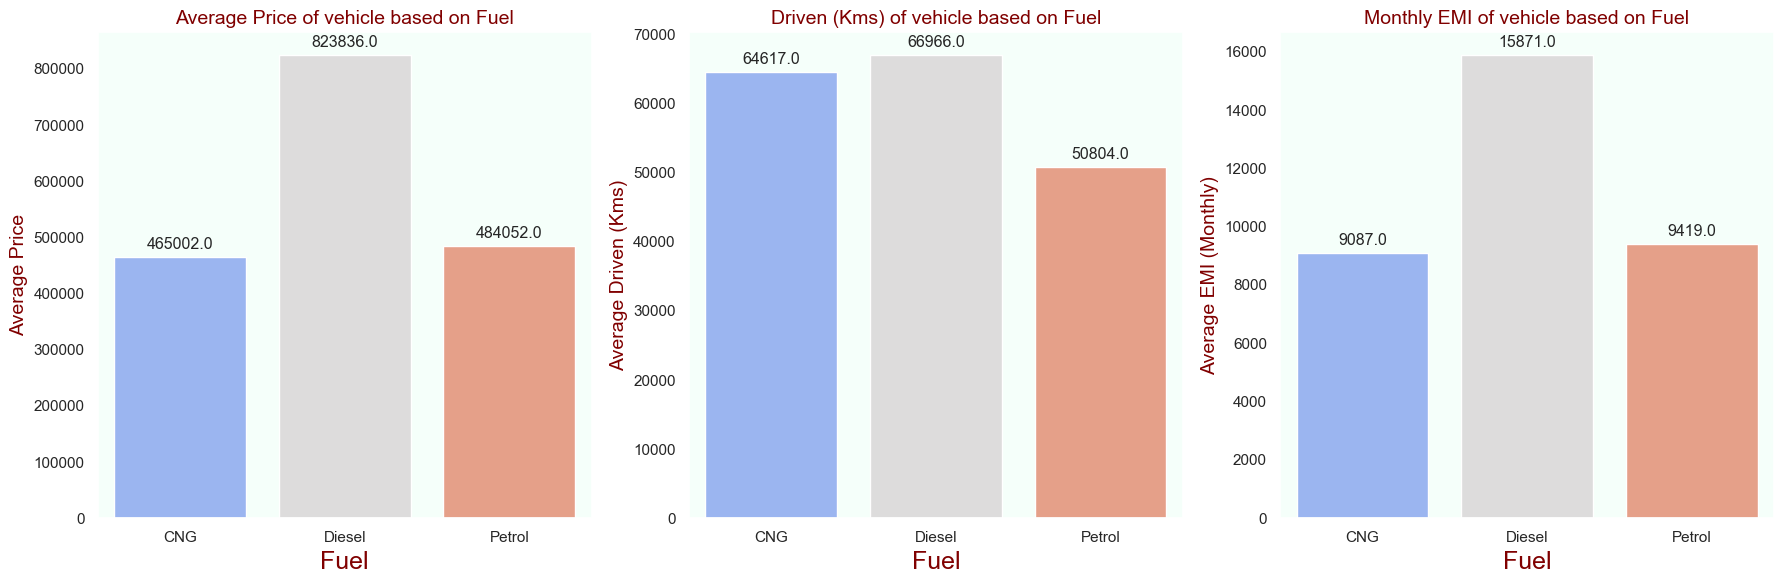

In [86]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=delhi,palette='coolwarm',ax =axes[0])
a.set_facecolor('mintcream')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=delhi,palette='coolwarm',ax =axes[1])
b.set_facecolor('mintcream')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=delhi,palette='coolwarm',ax =axes[2])
c.set_facecolor('mintcream')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.tight_layout()
a.grid(False)
b.grid(False)
c.grid(False)

### 18) Average Price, EMI, Driven(Kms) based on Fuel type in Hyderabad

In [87]:
models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
hyderabad = models[models['Location']=='Hyderabad']
hyderabad

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
9,Hyderabad,CNG,541000,2018,47615,1,10576
10,Hyderabad,Diesel,822611,2017,81076,1,15840
11,Hyderabad,LPG,303000,2012,51068,1,5924
12,Hyderabad,Petrol,556374,2017,57286,1,10809


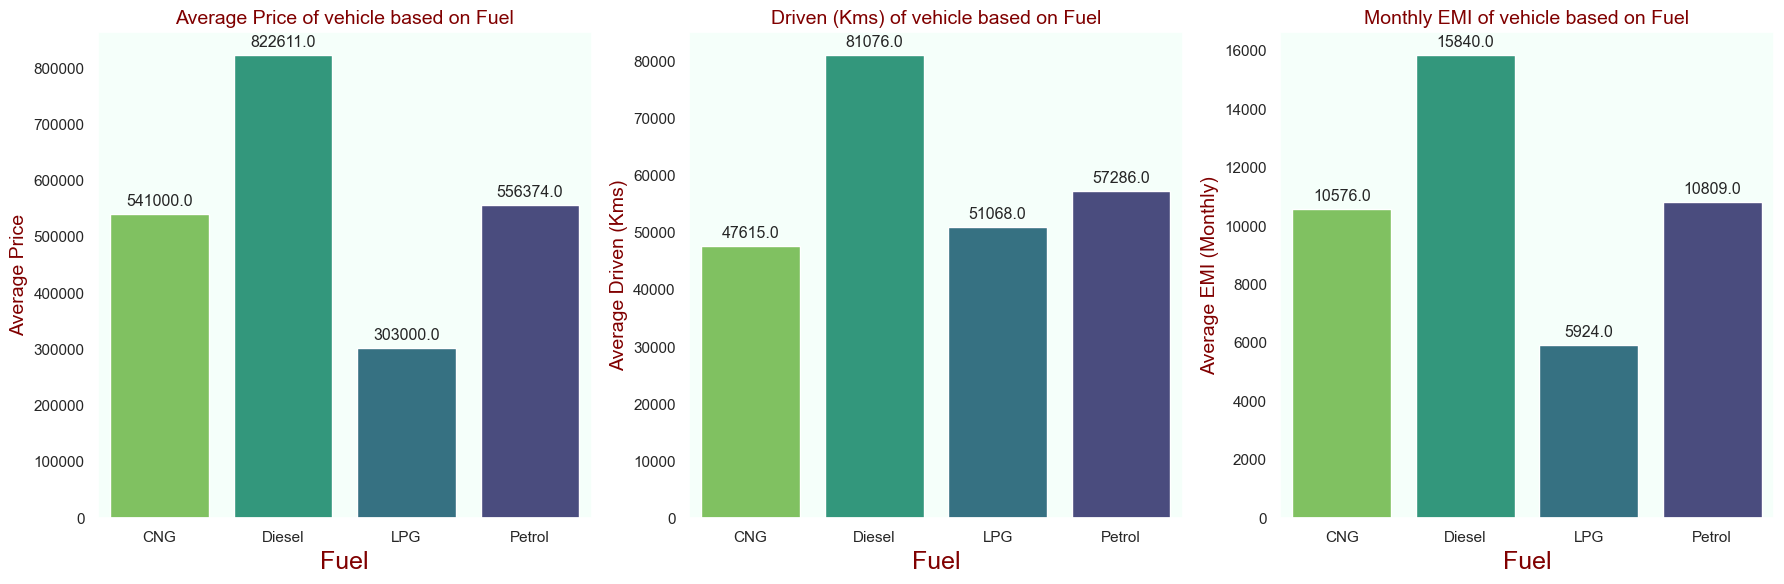

In [88]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=hyderabad,palette='viridis_r',ax =axes[0])
a.set_facecolor('mintcream')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=hyderabad,palette='viridis_r',ax =axes[1])
b.set_facecolor('mintcream')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=hyderabad,palette='viridis_r',ax =axes[2])
c.set_facecolor('mintcream')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.tight_layout()
a.grid(False)
b.grid(False)
c.grid(False)

### 19) Average Price, EMI, Driven(Kms) based on Fuel type in Mumbai

In [89]:
models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
mumbai = models[models['Location']=='Mumbai']
mumbai

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
13,Mumbai,CNG,506136,2017,60599,1,9872
14,Mumbai,Diesel,774008,2016,69794,1,14928
15,Mumbai,Petrol,614329,2016,44764,1,11914


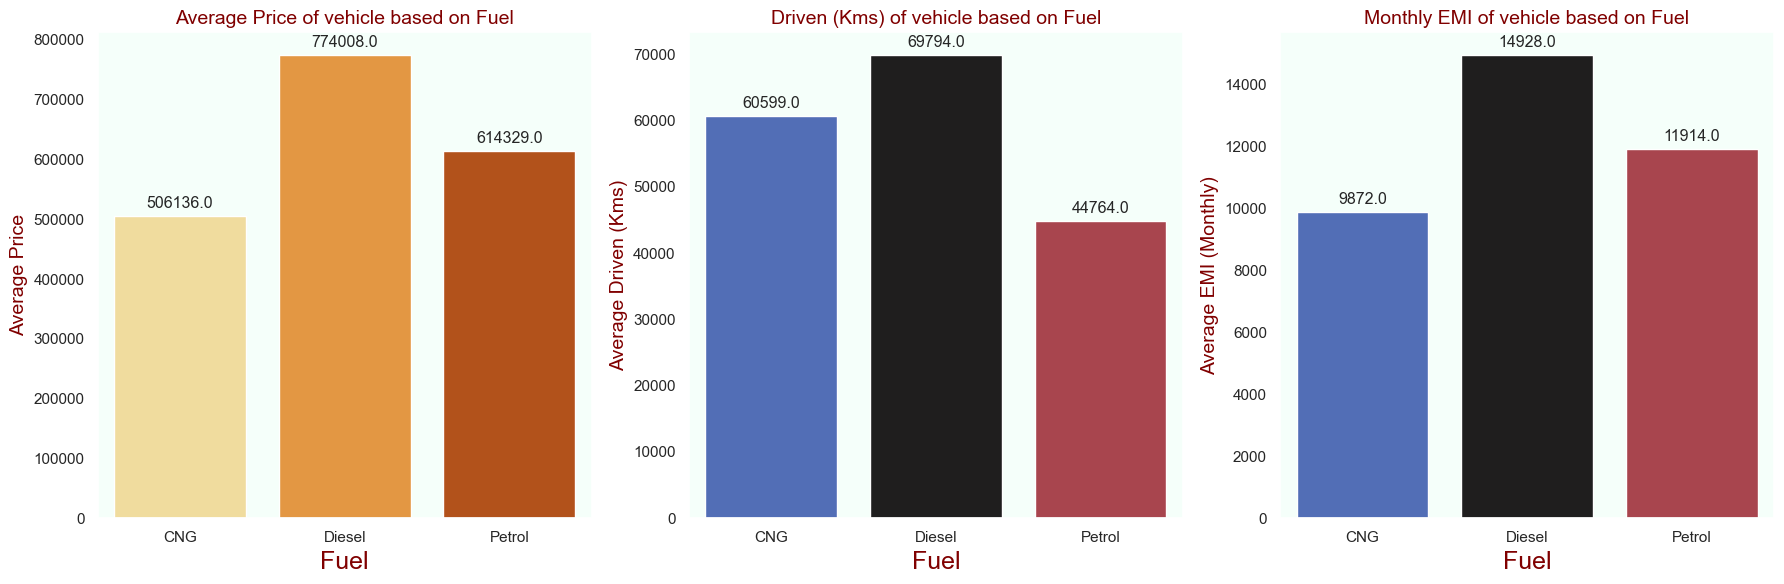

In [90]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=mumbai,palette='YlOrBr',ax =axes[0])
a.set_facecolor('mintcream')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=mumbai,palette='icefire',ax =axes[1])
b.set_facecolor('mintcream')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=mumbai,palette='icefire',ax =axes[2])
c.set_facecolor('mintcream')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.tight_layout()
a.grid(False)
b.grid(False)
c.grid(False)

### 20) Car with highest & lowest price in Hyderabad

In [91]:
by_model = df.groupby(by=['Location','Car Brand','Model']).median()
by_model = by_model.reset_index()
model_h = by_model[by_model["Location"]=='Hyderabad'].sort_values('Price',ascending=False)

In [92]:
def max_min(column):
    high = model_h[column].idxmax()
    high_model = pd.DataFrame(model_h.loc[high])
    low = model_h[column].idxmin()
    low_model = pd.DataFrame(model_h.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,1335,1163
Location,Hyderabad,Hyderabad
Car Brand,Tata,Hyundai
Model,XZ PLUS 2.0L,GL
Price,1965000.0,178000.0
Model Year,2022.0,2010.0
Driven (Kms),24989.0,81753.0
Ownership,1.0,1.0
EMI (monthly),37402.0,3480.0


### 21) Car with highest & lowest price in Delhi

In [93]:
model_d = by_model[by_model["Location"]=='Delhi'].sort_values('Price',ascending=False)

In [94]:
def max_min(column):
    high = model_d[column].idxmax()
    high_model = pd.DataFrame(model_d.loc[high])
    low = model_d[column].idxmin()
    low_model = pd.DataFrame(model_d.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,1047,772
Location,Delhi,Delhi
Car Brand,Toyota,Hyundai
Model,2.8 ZX AT 7 STR,GLS
Price,2010000.0,154000.0
Model Year,2019.0,2011.0
Driven (Kms),22655.0,73091.0
Ownership,1.0,1.0
EMI (monthly),38258.0,3011.0


### 22) Car with highest & lowest price in Mumbai

In [95]:
model_m = by_model[by_model["Location"]=='Mumbai'].sort_values('Price',ascending=False)

In [96]:
def max_min(column):
    high = model_m[column].idxmax()
    high_model = pd.DataFrame(model_m.loc[high])
    low = model_m[column].idxmin()
    low_model = pd.DataFrame(model_m.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,1462,1413
Location,Mumbai,Mumbai
Car Brand,Hyundai,Honda
Model,PLATINUM 1.5 MT 7STR,V MT
Price,1756000.0,227000.0
Model Year,2021.0,2012.0
Driven (Kms),23155.0,79996.0
Ownership,1.0,2.0
EMI (monthly),33424.0,4438.0


### 23) Car with highest & lowest price in Bangalore

In [97]:
model_b = by_model[by_model["Location"]=='Bangalore'].sort_values('Price',ascending=False)

In [98]:
def max_min(column):
    high = model_b[column].idxmax()
    high_model = pd.DataFrame(model_b.loc[high])
    low = model_b[column].idxmin()
    low_model = pd.DataFrame(model_b.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,359,277
Location,Bangalore,Bangalore
Car Brand,Tata,Nissan
Model,XZA PLUS GOLD,XL PETROL
Price,2212000.0,234000.0
Model Year,2022.0,2010.0
Driven (Kms),48686.0,34282.0
Ownership,1.0,1.0
EMI (monthly),42103.0,4575.0


### 24) Car with highest & lowest price in Chennai

In [99]:
model_c = by_model[by_model["Location"]=='Chennai'].sort_values('Price',ascending=False)

In [100]:
def max_min(column):
    high = model_c[column].idxmax()
    high_model = pd.DataFrame(model_c.loc[high])
    low = model_c[column].idxmin()
    low_model = pd.DataFrame(model_c.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,482,470
Location,Chennai,Chennai
Car Brand,Hyundai,Hyundai
Model,PLATINUM 1.5 MT 7STR,ERA 1.1
Price,2033000.0,254000.0
Model Year,2022.0,2012.0
Driven (Kms),3938.0,53806.0
Ownership,1.0,3.0
EMI (monthly),38696.0,4966.0


### 25) High budget & Low budger car among all cities

In [101]:
price = df.sort_values(by='Price',ascending=False)

In [102]:
def max_min(column):
    high = price[column].idxmax()
    high_model = pd.DataFrame(price.loc[high])
    low = price[column].idxmin()
    low_model = pd.DataFrame(price.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,4233,2355
Car Brand,Tata,Maruti
Model,XZA PLUS GOLD,LXI
Price,2212000,121000
Model Year,2022,2010
Location,Bangalore,Delhi
Fuel,Diesel,Petrol
Driven (Kms),48686,49984
Gear,Automatic,Manual
Ownership,1,1
EMI (monthly),42103,2366


### 26) Comparision of car brand count in different Cities

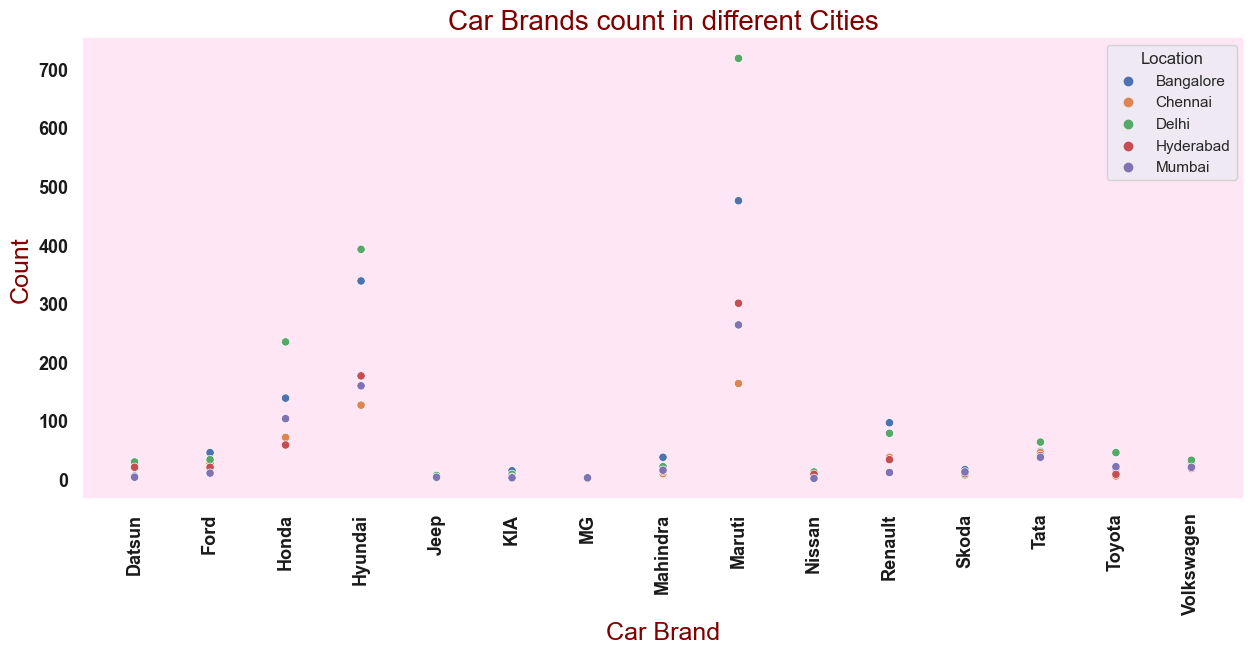

In [103]:
by_model = df.groupby(by=['Car Brand','Location'])['Price'].count().reset_index().rename(
    columns={'Price':'Count'})
sns.set(rc={'figure.figsize':(15,6)})
a = sns.scatterplot(y='Count',x='Car Brand',hue='Location',data=by_model)

a.set_ylabel("Count", fontsize = 18,color='maroon')
a.set_xlabel("Car Brand", fontsize =18, color='maroon')
a.set_title("Car Brands count in different Cities", fontsize =20, color='maroon')
a.set_facecolor('#FFE6F5')
plt.xticks(rotation = 90,fontsize=13,color='k',fontweight='bold')
plt.yticks(fontsize=13,color='k',fontweight='bold')
a.grid(False)
plt.show()

### 27) Car Brand vs Average Price

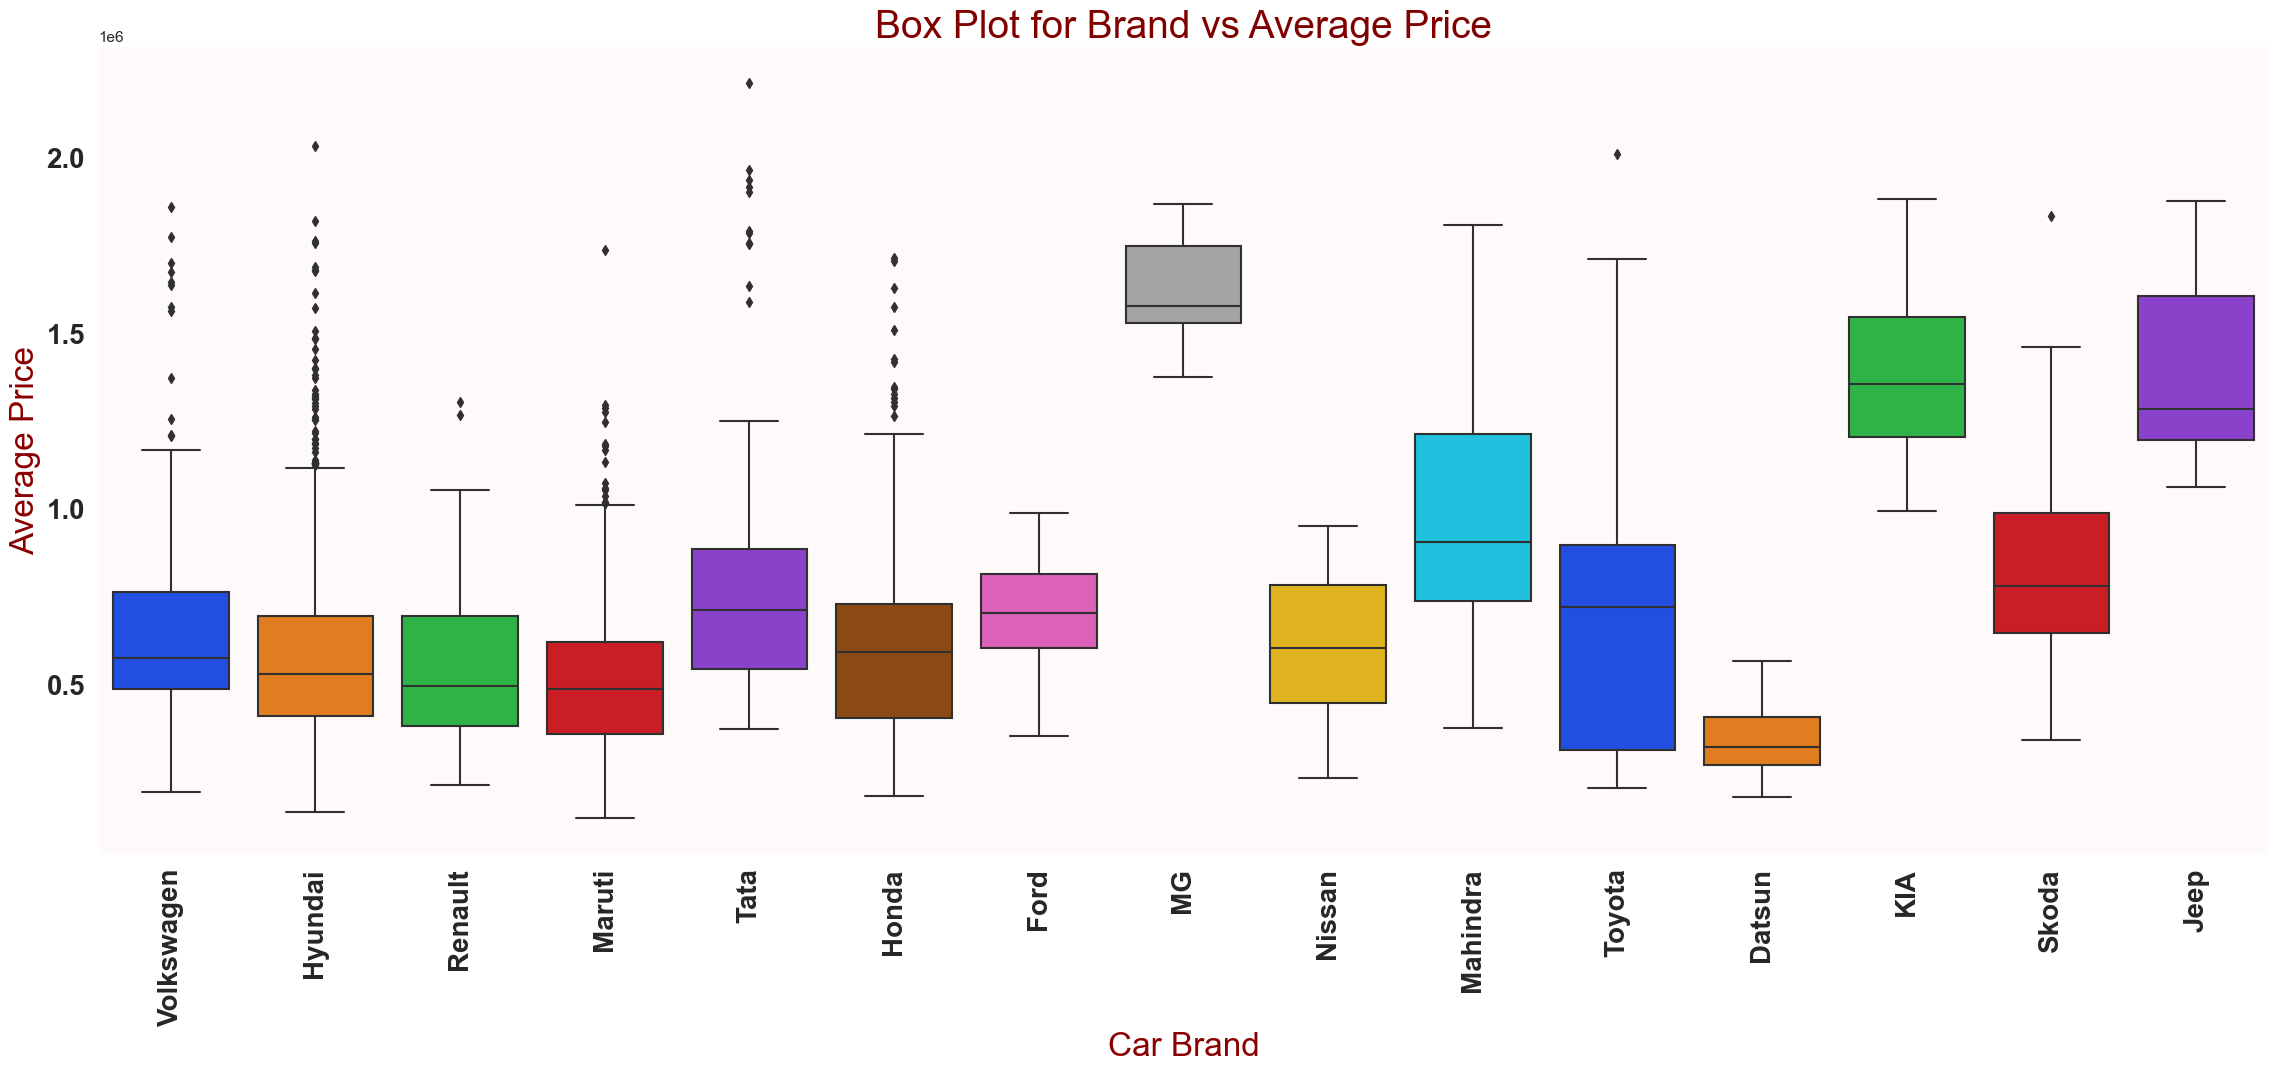

In [104]:
sns.set(rc={'figure.figsize':(28,10.5)})
a = sns.boxplot(x='Car Brand',y='Price',data=df,palette='bright')
a.set_xlabel("Car Brand", fontsize = 24,color='darkred')
a.set_ylabel("Average Price", fontsize =24, color='darkred')
plt.xticks(rotation=90,fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
a.set_title("Box Plot for Brand vs Average Price", fontsize =28, color='maroon')
a.set_facecolor('snow')
a.grid(False)
plt.show()

### 28) Heat Map for Correlation

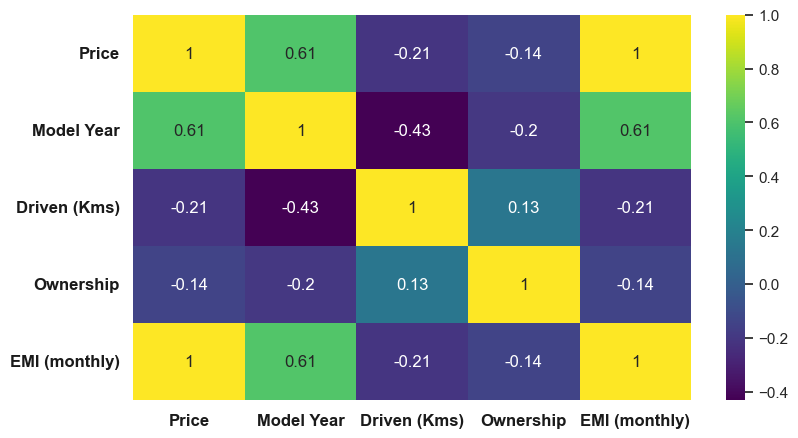

In [105]:
sns.set(rc={'figure.figsize':(9,5)})
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.xticks(fontsize=12,color='k',fontweight='bold')
plt.yticks(fontsize=12,color='k',fontweight='bold')
plt.show()

## Conclusion

- The availability of cars in 'Delhi'(1678+) is the highest among other 4 cities.
- Compared to other 4 cities 'Chennai'(554+) has less available cars.
- 'Maruti' brand cars are widely available with a count of around 1919 cars in all the cities, followed by Hyundai(1191), Honda(604).
- Most of the cars runs with 'Petrol' with a count of 4014.
- High budget car among all cities:
   - Tata XZA PLUS GOLD (2212000/-), 2022 Model, available in Bangalore. 
- Low budget car among all cities:
   - Maruti LXI (121000/-), 2010 Model, available in Delhi.

<b> Hyderabad City

- Most available brands - Maruti(300+), Hyundai(170+), Honda(55+), Tata(45+), Renault(35+).
- Cars availability - Petrol(593), Diesel(111), CNG(4), LPG(1).
- Recent year models availability - 2010(11), 2011(11), 2012(30), 2013(54), 2014(35), 2015(38), 2016(79), 2017(103), 2018(118), 2019(85), 2020(50), 2021(69), 2022(24), 2023(2).
- Availability based on Gear - Automatic(155), Manual(554).
- High Budget car - Tata XZ PLUS 2.0L (1965000/-), 2022 Model.
- Low Budget car - Hyundai GL (178000/-), 2010 Model.

<b> Delhi City

- Most available brands - Maruti(710+), Hyundai(400), Honda(230+), Renault(80+).
- Cars availability - Petrol(1392), Diesel(112), CNG(164)
- Recent year models availability - 2010(72), 2011(101), 2012(56), 2013(80), 2014(112), 2015(127), 2016(179), 2017(225), 2018(248), 2019(222), 2020(104), 2021(115), 2022(35), 2023(2).
- Availability based on Gear - Automatic(265), Manual(1423).
- High Budget car - Toyota 2.8 ZX AT 7 STR (2010000/-), 2019 Model.
- Low Budget car - Hyundai GLS (154000/-), 2011 Model.

<b> Mumbai City

- Most available brands - Maruti(263), Hyundai(159), Honda(103), Tata(37).
- Cars availability - Petrol(503), Diesel(83), CNG(76).
- Recent year models availability - 2010(7), 2011(13), 2012(27), 2013(33), 2014(48), 2015(75), 2016(87), 2017(123), 2018(71), 2019(69), 2020(39), 2021(49), 2022(21), 2023(0).
- Availability based on Gear - Automatic(190), Manual(472).
- High Budget car - Hyundai PLATINUM 1.5 MT 7 STR (1756000/-), 2021 Model.
- Low Budget car - Honda V MT (227000/-), 2012 Model.

<b> Bangalore City

- Most available brands - Maruti(480+), Hyundai(335+), Honda(140+), Renault(90+).
- Cars availability - Petrol(1059), Diesel(204), CNG(5).
- Recent year models availability - 2010(36), 2011(36), 2012(56), 2013(60), 2014(86), 2015(131), 2016(187), 2017(195), 2018(158), 2019(103), 2020(99), 2021(84), 2022(36), 2023(2).
- Availability based on Gear - Automatic(339), Manual(929).
- High Budget car - Tata XZA PLUS GOLD (2212000/-), 2022 Model.
- Low Budget car - Nissan XL PETROL (234000/-), 2010 Model.

<b> Chennai City

- Most available brands - Maruti(163), Hyundai(126), Honda(71), Tata(45).
- Cars availability - Petrol(467), Diesel(82), CNG(5).
- Recent year models availability - 2010(3), 2011(6), 2012(14), 2013(20), 2014(24), 2015(33), 2016(109), 2017(83), 2018(64), 2019(65), 2020(42), 2021(59), 2022(30), 2023(2).
- Availability based on Gear - Automatic(119), Manual(435).
- High Budget car - Tata HexaVaricor 400 XT (1801499/-), 2019 Model
- Low Budget car - ChevorletSparkLS 1.0 (171799/-), 2011 Model

<b> The above data in conclusion may change upon time to time because the data in the website is not static.